In [ ]:
from rdkit import rdBase
from rdkit import RDConfig
!pip install --pre deepchem
!pip install rdkit-pypi
!pip install rdkit-pypi
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 15.0 MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176725 sha256=41ca1614214397501ed5149f2e72f8c8901b60c8287f82d9f6aa0c4706c07e56
  Stored in directory: /root/.cache/pip/wheels/02/c0/2e/e7e3d63b431777712ebc128bc4deb9ac5cb19afc7c1ea341ec
Successfully built mordred


In [ ]:
!pip install --pre deepchem
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 693 kB 15.1 MB/s 
     |████████████████████████████████| 29.5 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 12.5 MB/s 


In [ ]:
import deepchem as dc
dc.__version__

'2.6.2.dev'

In [ ]:

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
import numpy as np
from mordred import Calculator, descriptors

In [ ]:
url = 'https://raw.githubusercontent.com/gashawmg/molecular-descriptors/main/Orbital_Energies_input_data.csv'
dataset = pd.read_csv(url)
dataset.shape

(2904, 2)

In [ ]:

dataset = pd.read_csv(url)
dataset.shape

#Generating cannonical smiles

In [ ]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

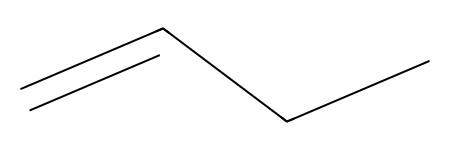

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

In [ ]:
Canon_SMILES = canonical_smiles(dataset.SMILES)
len(Canon_SMILES)

2904

In [ ]:
dataset['SMILES'] = Canon_SMILES
dataset

,SMILES,Energygap
0,Cc1ccc(C(F)(F)F)cc1,197.749421
1,O=C(O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,CC(C)=CCC[C@@H](C)CCO,209.569808
...,...,...
2899,c1ccc(P(CCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCOC(=O)N1c2ccccc2C=C[C@@H]1OCC,165.098245
2902,c1ccc2sccc2c1,167.958431


In [ ]:
duplicates_smiles = dataset[dataset['SMILES'].duplicated()]['SMILES'].values
len(duplicates_smiles)

31

In [ ]:
# Create a list for duplicate smiles
dataset[dataset['SMILES'].isin(duplicates_smiles)].sort_values(by=['SMILES'])

,SMILES,Energygap
218,C1=CCCCCCC1,214.097913
2125,C1=CCCCCCC1,214.097913
1901,C1CC[C@H]2CCCC[C@@H]2C1,251.144790
552,C1CC[C@H]2CCCC[C@@H]2C1,251.144790
554,C=CN1CCCC1=O,190.834900
1808,C=CN1CCCC1=O,190.835527
2203,C=Cc1ccccc1,168.467969
1354,C=Cc1ccccc1,168.475499
2341,C=Cc1ccccc1,168.490559
1265,C=Cc1ccncc1,174.833420


In [ ]:
dataset_new = dataset.drop_duplicates(subset=['SMILES'])
len(dataset_new)

2873

In [ ]:
dataset_new

,SMILES,Energygap
0,Cc1ccc(C(F)(F)F)cc1,197.749421
1,O=C(O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,CC(C)=CCC[C@@H](C)CCO,209.569808
...,...,...
2899,c1ccc(P(CCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCOC(=O)N1c2ccccc2C=C[C@@H]1OCC,165.098245
2902,c1ccc2sccc2c1,167.958431


Calculate descriptors using RDkit

### a. General molecular descriptors-about 200 molecular descriptors

In [ ]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset_new['SMILES'])

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.550510,-5.076351,12.550510,1.008796,0.546828,160.138,153.082,160.049985,60,0,...,0,0,0,0,0,0,0,0,0,0
1,10.676844,-3.333333,10.676844,1.840718,0.569323,122.551,115.495,122.013457,42,0,...,0,0,0,0,0,0,0,0,0,0
2,13.050084,-4.111425,13.050084,0.722809,0.790287,361.825,341.665,361.108086,132,0,...,0,0,0,0,0,0,0,0,0,0
3,7.402685,-0.449630,7.402685,0.074321,0.582519,162.019,156.979,160.979905,48,0,...,0,0,0,0,0,0,0,0,0,0
4,8.095237,-4.484184,8.095237,1.886963,0.606746,156.269,136.109,156.151415,66,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,9.505488,-3.873136,9.505488,0.973292,0.373065,398.426,374.234,398.135324,138,0,...,0,0,0,0,0,0,0,0,0,0
2869,7.651157,-0.170718,7.651157,0.017477,0.625891,213.099,208.059,211.929533,50,0,...,0,0,0,0,0,0,0,1,0,0
2870,13.017078,-3.813937,13.017078,0.325694,0.823664,247.294,230.158,247.120843,96,0,...,0,0,0,0,0,0,0,0,0,0
2871,7.592407,-0.348333,7.592407,0.030556,0.519376,134.203,128.155,134.019021,44,0,...,0,0,0,0,0,0,0,1,0,0


b. Fingerprints

In [ ]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [ ]:
Morgan_fpts = morgan_fpts(dataset_new['SMILES'])
Morgan_fpts.shape

(2873, 2048)

In [ ]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(dataset_new['SMILES'])

100%|██████████| 2873/2873 [09:43<00:00,  4.92it/s]


In [ ]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.302711,7.763360,0,0,12.527341,2.311476,4.622953,12.527341,1.138849,3.302522,...,9.182249,41.326257,160.049985,8.891666,152,13,54.0,59.0,5.284722,2.333333
1,4.461420,4.736714,1,0,7.727407,1.931852,3.863703,7.727407,1.103915,2.752227,...,7.321850,31.336140,122.013457,8.715247,52,4,24.0,22.0,3.861111,1.833333
2,19.038123,14.818400,1,0,30.648742,2.324224,4.648448,30.648742,1.225950,4.118873,...,9.931735,59.295845,361.108086,8.024624,1882,35,124.0,139.0,9.729167,5.486111
3,6.651690,6.355891,0,0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,8.806724,37.839725,160.979905,11.498565,84,10,42.0,46.0,4.083333,2.027778
4,7.399237,7.388977,0,0,12.133645,2.047810,4.095621,12.133645,1.103059,3.219224,...,8.131825,38.565088,156.151415,5.037142,194,9,42.0,41.0,5.472222,2.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,21.758550,17.000581,0,0,38.253985,2.374938,4.749876,38.253985,1.366214,4.258939,...,10.073357,62.971588,398.135324,7.656449,2014,41,142.0,164.0,6.166667,6.361111
2869,7.806684,7.343579,0,0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,211.929533,14.128636,105,12,52.0,61.0,2.833333,2.222222
2870,13.382658,11.741399,0,0,22.978744,2.442763,4.885526,22.978744,1.276597,3.800055,...,9.763593,50.871918,247.120843,7.060596,574,28,88.0,103.0,6.055556,4.277778
2871,7.030628,6.547610,0,0,12.170709,2.322596,4.516123,12.170709,1.352301,3.160409,...,8.914761,51.887188,134.019021,8.934601,79,9,46.0,53.0,1.972222,2.027778


In [ ]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets
print(train_dataset)

<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>


In [ ]:
train_dataset.w

array([[1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 0.        ,
        1.05288369],
       ...,
       [1.04502242, 0.        , 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 0.        , 1.17464996,
        1.05288369]])

In [ ]:
model = dc.models.MultitaskClassifier(n_tasks=12, n_features=1024, layer_sizes=[1000])

In [ ]:
model.fit(train_dataset, nb_epoch=10)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('training set score:', model.evaluate(train_dataset, [metric], transformers))
print('test set score:', model.evaluate(test_dataset, [metric], transformers))

training set score: {'roc_auc_score': 0.9578178897957511}
test set score: {'roc_auc_score': 0.6833243935613527}


In [ ]:
%matplotlib inline
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromMolFile('data/input.mol')
stringWithMolData=file('data/input.mol','r').read()
m3 = Chem.MolFromMolBlock(stringWithMolData) #returns a rdkit.Chem.rdchem.Mol as an object
#deriving output results from molecules
m4 = Chem.MolFromSmiles(m2)
print Chem.MolToMolBlock(m4)

In [ ]:
#deriving output results from molecules
m2 = Chem.MolFromSmiles('C1CCC1')
print Chem.MolToMolBlock(m2)

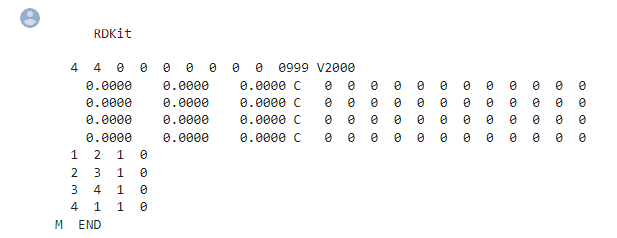

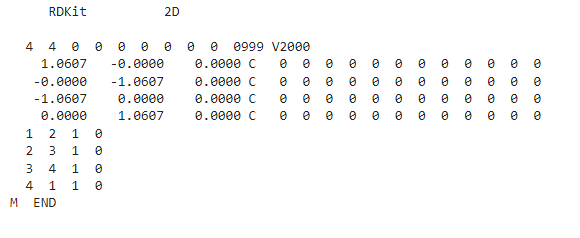

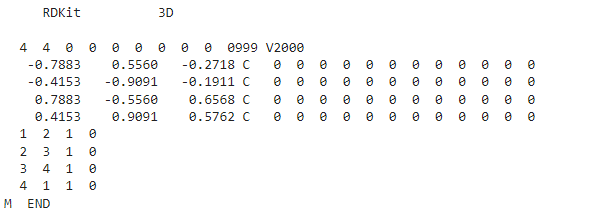

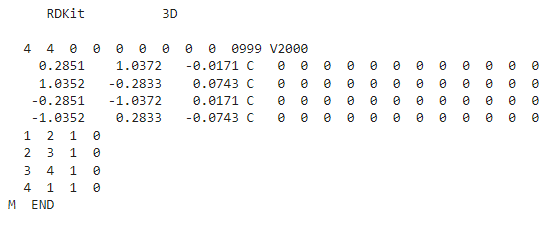

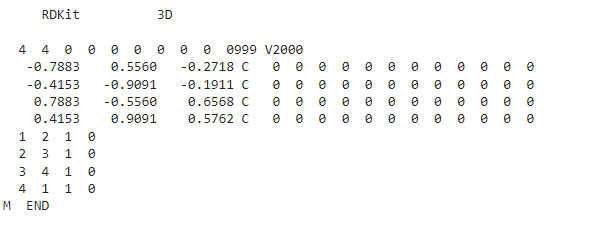

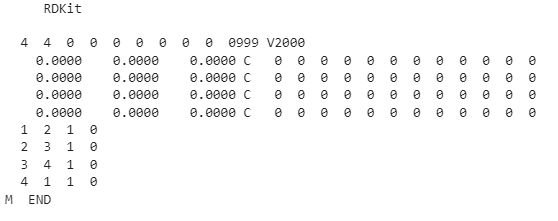

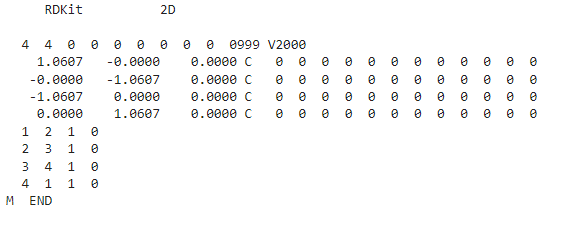

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
_URL = 'data.zip'
path_to_zip = tf.keras.utils.get_file('dataset.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'data')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

In [ ]:
#odor vs odorless
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches)
validation_dataset = validation_dataset.skip(val_batches)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


### Use data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

### Rescale pixel values



In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

## Create the base model.

In [ ]:

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

   8192/9406464 [..............................] - ETA: 0s

4202496/9406464 [============>.................] - ETA: 0s

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Feature extraction
we will freeze the convolutional base created from the previous step and to use as a feature extractor; add a classifier on top of it and train the top-level classifier.

### Freeze the convolutional base

In [ ]:
base_model.trainable = False

In [ ]:
# the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"


__________________________________________________________________________________________________


 Layer (type)                   Output Shape         Param #     Connected to                     


 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               


                                )]                                                                


 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                


 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  


 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']               


 expanded_conv_depthwise (Depth  (None, 80, 80, 32)  288         ['Conv1_relu[0][0]']             


 wiseConv2D)                                                                                      


 expanded_conv_depthwise_BN (Ba  (None, 80, 80, 32)  128         ['expanded_conv_depthwise[0][0]']


 tchNormalization)                                                                                


 expanded_conv_depthwise_relu (  (None, 80, 80, 32)  0           ['expanded_conv_depthwise_BN[0][0


 ReLU)                                                           ]']                              


 expanded_conv_project (Conv2D)  (None, 80, 80, 16)  512         ['expanded_conv_depthwise_relu[0]


                                                                 [0]']                            


 expanded_conv_project_BN (Batc  (None, 80, 80, 16)  64          ['expanded_conv_project[0][0]']  


 hNormalization)                                                                                  


 block_1_expand (Conv2D)        (None, 80, 80, 96)   1536        ['expanded_conv_project_BN[0][0]'


                                                                 ]                                


 block_1_expand_BN (BatchNormal  (None, 80, 80, 96)  384         ['block_1_expand[0][0]']         


 ization)                                                                                         


 block_1_expand_relu (ReLU)     (None, 80, 80, 96)   0           ['block_1_expand_BN[0][0]']      


 block_1_pad (ZeroPadding2D)    (None, 81, 81, 96)   0           ['block_1_expand_relu[0][0]']    


 block_1_depthwise (DepthwiseCo  (None, 40, 40, 96)  864         ['block_1_pad[0][0]']            


 nv2D)                                                                                            


 block_1_depthwise_BN (BatchNor  (None, 40, 40, 96)  384         ['block_1_depthwise[0][0]']      


 malization)                                                                                      


 block_1_depthwise_relu (ReLU)  (None, 40, 40, 96)   0           ['block_1_depthwise_BN[0][0]']   


 block_1_project (Conv2D)       (None, 40, 40, 24)   2304        ['block_1_depthwise_relu[0][0]'] 


 block_1_project_BN (BatchNorma  (None, 40, 40, 24)  96          ['block_1_project[0][0]']        


 lization)                                                                                        


 block_2_expand (Conv2D)        (None, 40, 40, 144)  3456        ['block_1_project_BN[0][0]']     


 block_2_expand_BN (BatchNormal  (None, 40, 40, 144)  576        ['block_2_expand[0][0]']         


 ization)                                                                                         


 block_2_expand_relu (ReLU)     (None, 40, 40, 144)  0           ['block_2_expand_BN[0][0]']      


 block_2_depthwise (DepthwiseCo  (None, 40, 40, 144)  1296       ['block_2_expand_relu[0][0]']    


 nv2D)                                                                                            


 block_2_depthwise_BN (BatchNor  (None, 40, 40, 144)  576        ['block_2_depthwise[0][0]']      


 malization)                                                                                      


 block_2_depthwise_relu (ReLU)  (None, 40, 40, 144)  0           ['block_2_depthwise_BN[0][0]']   


 block_2_project (Conv2D)       (None, 40, 40, 24)   3456        ['block_2_depthwise_relu[0][0]'] 


 block_2_project_BN (BatchNorma  (None, 40, 40, 24)  96          ['block_2_project[0][0]']        


 lization)                                                                                        


 block_2_add (Add)              (None, 40, 40, 24)   0           ['block_1_project_BN[0][0]',     


                                                                  'block_2_project_BN[0][0]']     


 block_3_expand (Conv2D)        (None, 40, 40, 144)  3456        ['block_2_add[0][0]']            


 block_3_expand_BN (BatchNormal  (None, 40, 40, 144)  576        ['block_3_expand[0][0]']         


 ization)                                                                                         


 block_3_expand_relu (ReLU)     (None, 40, 40, 144)  0           ['block_3_expand_BN[0][0]']      


 block_3_pad (ZeroPadding2D)    (None, 41, 41, 144)  0           ['block_3_expand_relu[0][0]']    


 block_3_depthwise (DepthwiseCo  (None, 20, 20, 144)  1296       ['block_3_pad[0][0]']            


 nv2D)                                                                                            


 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      


 malization)                                                                                      


 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   


 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 


 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        


 lization)                                                                                        


 block_4_expand (Conv2D)        (None, 20, 20, 192)  6144        ['block_3_project_BN[0][0]']     


 block_4_expand_BN (BatchNormal  (None, 20, 20, 192)  768        ['block_4_expand[0][0]']         


 ization)                                                                                         


 block_4_expand_relu (ReLU)     (None, 20, 20, 192)  0           ['block_4_expand_BN[0][0]']      


 block_4_depthwise (DepthwiseCo  (None, 20, 20, 192)  1728       ['block_4_expand_relu[0][0]']    


 nv2D)                                                                                            


 block_4_depthwise_BN (BatchNor  (None, 20, 20, 192)  768        ['block_4_depthwise[0][0]']      


 malization)                                                                                      


 block_4_depthwise_relu (ReLU)  (None, 20, 20, 192)  0           ['block_4_depthwise_BN[0][0]']   


 block_4_project (Conv2D)       (None, 20, 20, 32)   6144        ['block_4_depthwise_relu[0][0]'] 


 block_4_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_4_project[0][0]']        


 lization)                                                                                        


 block_4_add (Add)              (None, 20, 20, 32)   0           ['block_3_project_BN[0][0]',     


                                                                  'block_4_project_BN[0][0]']     


 block_5_expand (Conv2D)        (None, 20, 20, 192)  6144        ['block_4_add[0][0]']            


 block_5_expand_BN (BatchNormal  (None, 20, 20, 192)  768        ['block_5_expand[0][0]']         


 ization)                                                                                         


 block_5_expand_relu (ReLU)     (None, 20, 20, 192)  0           ['block_5_expand_BN[0][0]']      


 block_5_depthwise (DepthwiseCo  (None, 20, 20, 192)  1728       ['block_5_expand_relu[0][0]']    


 nv2D)                                                                                            


 block_5_depthwise_BN (BatchNor  (None, 20, 20, 192)  768        ['block_5_depthwise[0][0]']      


 malization)                                                                                      


 block_5_depthwise_relu (ReLU)  (None, 20, 20, 192)  0           ['block_5_depthwise_BN[0][0]']   


 block_5_project (Conv2D)       (None, 20, 20, 32)   6144        ['block_5_depthwise_relu[0][0]'] 


 block_5_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_5_project[0][0]']        


 lization)                                                                                        


 block_5_add (Add)              (None, 20, 20, 32)   0           ['block_4_add[0][0]',            


                                                                  'block_5_project_BN[0][0]']     


 block_6_expand (Conv2D)        (None, 20, 20, 192)  6144        ['block_5_add[0][0]']            


 block_6_expand_BN (BatchNormal  (None, 20, 20, 192)  768        ['block_6_expand[0][0]']         


 ization)                                                                                         


 block_6_expand_relu (ReLU)     (None, 20, 20, 192)  0           ['block_6_expand_BN[0][0]']      


 block_6_pad (ZeroPadding2D)    (None, 21, 21, 192)  0           ['block_6_expand_relu[0][0]']    


 block_6_depthwise (DepthwiseCo  (None, 10, 10, 192)  1728       ['block_6_pad[0][0]']            


 nv2D)                                                                                            


 block_6_depthwise_BN (BatchNor  (None, 10, 10, 192)  768        ['block_6_depthwise[0][0]']      


 malization)                                                                                      


 block_6_depthwise_relu (ReLU)  (None, 10, 10, 192)  0           ['block_6_depthwise_BN[0][0]']   


 block_6_project (Conv2D)       (None, 10, 10, 64)   12288       ['block_6_depthwise_relu[0][0]'] 


 block_6_project_BN (BatchNorma  (None, 10, 10, 64)  256         ['block_6_project[0][0]']        


 lization)                                                                                        


 block_7_expand (Conv2D)        (None, 10, 10, 384)  24576       ['block_6_project_BN[0][0]']     


 block_7_expand_BN (BatchNormal  (None, 10, 10, 384)  1536       ['block_7_expand[0][0]']         


 ization)                                                                                         


 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      


 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    


 nv2D)                                                                                            


 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      


 malization)                                                                                      


 block_7_depthwise_relu (ReLU)  (None, 10, 10, 384)  0           ['block_7_depthwise_BN[0][0]']   


 block_7_project (Conv2D)       (None, 10, 10, 64)   24576       ['block_7_depthwise_relu[0][0]'] 


 block_7_project_BN (BatchNorma  (None, 10, 10, 64)  256         ['block_7_project[0][0]']        


 lization)                                                                                        


 block_7_add (Add)              (None, 10, 10, 64)   0           ['block_6_project_BN[0][0]',     


                                                                  'block_7_project_BN[0][0]']     


 block_8_expand (Conv2D)        (None, 10, 10, 384)  24576       ['block_7_add[0][0]']            


 block_8_expand_BN (BatchNormal  (None, 10, 10, 384)  1536       ['block_8_expand[0][0]']         


 ization)                                                                                         


 block_8_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_8_expand_BN[0][0]']      


 block_8_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_8_expand_relu[0][0]']    


 nv2D)                                                                                            


 block_8_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_8_depthwise[0][0]']      


 malization)                                                                                      


 block_8_depthwise_relu (ReLU)  (None, 10, 10, 384)  0           ['block_8_depthwise_BN[0][0]']   


 block_8_project (Conv2D)       (None, 10, 10, 64)   24576       ['block_8_depthwise_relu[0][0]'] 


 block_8_project_BN (BatchNorma  (None, 10, 10, 64)  256         ['block_8_project[0][0]']        


 lization)                                                                                        


 block_8_add (Add)              (None, 10, 10, 64)   0           ['block_7_add[0][0]',            


                                                                  'block_8_project_BN[0][0]']     


 block_9_expand (Conv2D)        (None, 10, 10, 384)  24576       ['block_8_add[0][0]']            


 block_9_expand_BN (BatchNormal  (None, 10, 10, 384)  1536       ['block_9_expand[0][0]']         


 ization)                                                                                         


 block_9_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_9_expand_BN[0][0]']      


 block_9_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_9_expand_relu[0][0]']    


 nv2D)                                                                                            


 block_9_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_9_depthwise[0][0]']      


 malization)                                                                                      


 block_9_depthwise_relu (ReLU)  (None, 10, 10, 384)  0           ['block_9_depthwise_BN[0][0]']   


 block_9_project (Conv2D)       (None, 10, 10, 64)   24576       ['block_9_depthwise_relu[0][0]'] 


 block_9_project_BN (BatchNorma  (None, 10, 10, 64)  256         ['block_9_project[0][0]']        


 lization)                                                                                        


 block_9_add (Add)              (None, 10, 10, 64)   0           ['block_8_add[0][0]',            


                                                                  'block_9_project_BN[0][0]']     


 block_10_expand (Conv2D)       (None, 10, 10, 384)  24576       ['block_9_add[0][0]']            


 block_10_expand_BN (BatchNorma  (None, 10, 10, 384)  1536       ['block_10_expand[0][0]']        


 lization)                                                                                        


 block_10_expand_relu (ReLU)    (None, 10, 10, 384)  0           ['block_10_expand_BN[0][0]']     


 block_10_depthwise (DepthwiseC  (None, 10, 10, 384)  3456       ['block_10_expand_relu[0][0]']   


 onv2D)                                                                                           


 block_10_depthwise_BN (BatchNo  (None, 10, 10, 384)  1536       ['block_10_depthwise[0][0]']     


 rmalization)                                                                                     


 block_10_depthwise_relu (ReLU)  (None, 10, 10, 384)  0          ['block_10_depthwise_BN[0][0]']  


 block_10_project (Conv2D)      (None, 10, 10, 96)   36864       ['block_10_depthwise_relu[0][0]']


 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       


 alization)                                                                                       


 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    


 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        


 lization)                                                                                        


 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     


 block_11_depthwise (DepthwiseC  (None, 10, 10, 576)  5184       ['block_11_expand_relu[0][0]']   


 onv2D)                                                                                           


 block_11_depthwise_BN (BatchNo  (None, 10, 10, 576)  2304       ['block_11_depthwise[0][0]']     


 rmalization)                                                                                     


 block_11_depthwise_relu (ReLU)  (None, 10, 10, 576)  0          ['block_11_depthwise_BN[0][0]']  


 block_11_project (Conv2D)      (None, 10, 10, 96)   55296       ['block_11_depthwise_relu[0][0]']


 block_11_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_11_project[0][0]']       


 alization)                                                                                       


 block_11_add (Add)             (None, 10, 10, 96)   0           ['block_10_project_BN[0][0]',    


                                                                  'block_11_project_BN[0][0]']    


 block_12_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_11_add[0][0]']           


 block_12_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_12_expand[0][0]']        


 lization)                                                                                        


 block_12_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_12_expand_BN[0][0]']     


 block_12_depthwise (DepthwiseC  (None, 10, 10, 576)  5184       ['block_12_expand_relu[0][0]']   


 onv2D)                                                                                           


 block_12_depthwise_BN (BatchNo  (None, 10, 10, 576)  2304       ['block_12_depthwise[0][0]']     


 rmalization)                                                                                     


 block_12_depthwise_relu (ReLU)  (None, 10, 10, 576)  0          ['block_12_depthwise_BN[0][0]']  


 block_12_project (Conv2D)      (None, 10, 10, 96)   55296       ['block_12_depthwise_relu[0][0]']


 block_12_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_12_project[0][0]']       


 alization)                                                                                       


 block_12_add (Add)             (None, 10, 10, 96)   0           ['block_11_add[0][0]',           


                                                                  'block_12_project_BN[0][0]']    


 block_13_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_12_add[0][0]']           


 block_13_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_13_expand[0][0]']        


 lization)                                                                                        


 block_13_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_13_expand_BN[0][0]']     


 block_13_pad (ZeroPadding2D)   (None, 11, 11, 576)  0           ['block_13_expand_relu[0][0]']   


 block_13_depthwise (DepthwiseC  (None, 5, 5, 576)   5184        ['block_13_pad[0][0]']           


 onv2D)                                                                                           


 block_13_depthwise_BN (BatchNo  (None, 5, 5, 576)   2304        ['block_13_depthwise[0][0]']     


 rmalization)                                                                                     


 block_13_depthwise_relu (ReLU)  (None, 5, 5, 576)   0           ['block_13_depthwise_BN[0][0]']  


 block_13_project (Conv2D)      (None, 5, 5, 160)    92160       ['block_13_depthwise_relu[0][0]']


 block_13_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_13_project[0][0]']       


 alization)                                                                                       


 block_14_expand (Conv2D)       (None, 5, 5, 960)    153600      ['block_13_project_BN[0][0]']    


 block_14_expand_BN (BatchNorma  (None, 5, 5, 960)   3840        ['block_14_expand[0][0]']        


 lization)                                                                                        


 block_14_expand_relu (ReLU)    (None, 5, 5, 960)    0           ['block_14_expand_BN[0][0]']     


 block_14_depthwise (DepthwiseC  (None, 5, 5, 960)   8640        ['block_14_expand_relu[0][0]']   


 onv2D)                                                                                           


 block_14_depthwise_BN (BatchNo  (None, 5, 5, 960)   3840        ['block_14_depthwise[0][0]']     


 rmalization)                                                                                     


 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  


 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']


 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       


 alization)                                                                                       


 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    


                                                                  'block_14_project_BN[0][0]']    


 block_15_expand (Conv2D)       (None, 5, 5, 960)    153600      ['block_14_add[0][0]']           


 block_15_expand_BN (BatchNorma  (None, 5, 5, 960)   3840        ['block_15_expand[0][0]']        


 lization)                                                                                        


 block_15_expand_relu (ReLU)    (None, 5, 5, 960)    0           ['block_15_expand_BN[0][0]']     


 block_15_depthwise (DepthwiseC  (None, 5, 5, 960)   8640        ['block_15_expand_relu[0][0]']   


 onv2D)                                                                                           


 block_15_depthwise_BN (BatchNo  (None, 5, 5, 960)   3840        ['block_15_depthwise[0][0]']     


 rmalization)                                                                                     


 block_15_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_15_depthwise_BN[0][0]']  


 block_15_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_15_depthwise_relu[0][0]']


 block_15_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_15_project[0][0]']       


 alization)                                                                                       


 block_15_add (Add)             (None, 5, 5, 160)    0           ['block_14_add[0][0]',           


                                                                  'block_15_project_BN[0][0]']    


 block_16_expand (Conv2D)       (None, 5, 5, 960)    153600      ['block_15_add[0][0]']           


 block_16_expand_BN (BatchNorma  (None, 5, 5, 960)   3840        ['block_16_expand[0][0]']        


 lization)                                                                                        


 block_16_expand_relu (ReLU)    (None, 5, 5, 960)    0           ['block_16_expand_BN[0][0]']     


 block_16_depthwise (DepthwiseC  (None, 5, 5, 960)   8640        ['block_16_expand_relu[0][0]']   


 onv2D)                                                                                           


 block_16_depthwise_BN (BatchNo  (None, 5, 5, 960)   3840        ['block_16_depthwise[0][0]']     


 rmalization)                                                                                     


 block_16_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_16_depthwise_BN[0][0]']  


 block_16_project (Conv2D)      (None, 5, 5, 320)    307200      ['block_16_depthwise_relu[0][0]']


 block_16_project_BN (BatchNorm  (None, 5, 5, 320)   1280        ['block_16_project[0][0]']       


 alization)                                                                                       


 Conv_1 (Conv2D)                (None, 5, 5, 1280)   409600      ['block_16_project_BN[0][0]']    


 Conv_1_bn (BatchNormalization)  (None, 5, 5, 1280)  5120        ['Conv_1[0][0]']                 


 out_relu (ReLU)                (None, 5, 5, 1280)   0           ['Conv_1_bn[0][0]']              


Total params: 2,257,984


Trainable params: 0


Non-trainable params: 2,257,984


__________________________________________________________________________________________________


### Add a classification head

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

### Compile the model



In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         


 sequential (Sequential)     (None, 160, 160, 3)       0         


 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         


 )                                                               


 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         


 a)                                                              


 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   


 ional)                                                          


 global_average_pooling2d (G  (None, 1280)             0         


 lobalAveragePooling2D)                                          


 dropout (Dropout)           (None, 1280)              0         


 dense (Dense)               (None, 1)                 1281      


Total params: 2,259,265


Trainable params: 1,281


Non-trainable params: 2,257,984


_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

### Train the model



In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

 1/26 [>.............................] - ETA: 32s - loss: 0.8032 - accuracy: 0.4688

 4/26 [===>..........................] - ETA: 0s - loss: 0.8377 - accuracy: 0.4453 

 7/26 [=======>......................] - ETA: 0s - loss: 0.8395 - accuracy: 0.4598

10/26 [==========>...................] - ETA: 0s - loss: 0.8248 - accuracy: 0.4625

13/26 [==============>...............] - ETA: 0s - loss: 0.8257 - accuracy: 0.4760

16/26 [=================>............] - ETA: 0s - loss: 0.8152 - accuracy: 0.4844

19/26 [====================>.........] - ETA: 0s - loss: 0.8223 - accuracy: 0.4803

22/26 [========================>.....] - ETA: 0s - loss: 0.8375 - accuracy: 0.4744

26/26 [==============================] - ETA: 0s - loss: 0.8350 - accuracy: 0.4802

26/26 [==============================] - 2s 20ms/step - loss: 0.8350 - accuracy: 0.4802


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.83
initial accuracy: 0.48


In [ ]:

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10


 1/63 [..............................] - ETA: 2:36 - loss: 0.9221 - accuracy: 0.4375

 3/63 [>.............................] - ETA: 1s - loss: 0.9257 - accuracy: 0.4375  

 5/63 [=>............................] - ETA: 1s - loss: 0.9143 - accuracy: 0.4437

 7/63 [==>...........................] - ETA: 1s - loss: 0.8891 - accuracy: 0.4643

 9/63 [===>..........................] - ETA: 1s - loss: 0.8917 - accuracy: 0.4618

11/63 [====>.........................] - ETA: 1s - loss: 0.8820 - accuracy: 0.4744

13/63 [=====>........................] - ETA: 1s - loss: 0.8773 - accuracy: 0.4712

15/63 [======>.......................] - ETA: 1s - loss: 0.8791 - accuracy: 0.4667

17/63 [=======>......................] - ETA: 1s - loss: 0.8674 - accuracy: 0.4779

19/63 [========>.....................] - ETA: 1s - loss: 0.8602 - accuracy: 0.4786

21/63 [=========>....................] - ETA: 1s - loss: 0.8539 - accuracy: 0.4940

23/63 [=========>....................] - ETA: 1s - loss: 0.8539 - accuracy: 0.4932

25/63 [==========>...................] - ETA: 1s - loss: 0.8612 - accuracy: 0.4888

27/63 [===========>..................] - ETA: 1s - loss: 0.8444 - accuracy: 0.4954

29/63 [============>.................] - ETA: 0s - loss: 0.8350 - accuracy: 0.4978

31/63 [=============>................] - ETA: 0s - loss: 0.8340 - accuracy: 0.5010

33/63 [==============>...............] - ETA: 0s - loss: 0.8231 - accuracy: 0.5066

35/63 [===============>..............] - ETA: 0s - loss: 0.8210 - accuracy: 0.5054

37/63 [================>.............] - ETA: 0s - loss: 0.8163 - accuracy: 0.5084

39/63 [=================>............] - ETA: 0s - loss: 0.8099 - accuracy: 0.5112

41/63 [==================>...........] - ETA: 0s - loss: 0.8038 - accuracy: 0.5130

43/63 [===================>..........] - ETA: 0s - loss: 0.7985 - accuracy: 0.5145

45/63 [====================>.........] - ETA: 0s - loss: 0.7986 - accuracy: 0.5132

47/63 [=====================>........] - ETA: 0s - loss: 0.7938 - accuracy: 0.5186

49/63 [======================>.......] - ETA: 0s - loss: 0.7915 - accuracy: 0.5198

51/63 [=======================>......] - ETA: 0s - loss: 0.7868 - accuracy: 0.5257

53/63 [========================>.....] - ETA: 0s - loss: 0.7841 - accuracy: 0.5277

55/63 [=========================>....] - ETA: 0s - loss: 0.7795 - accuracy: 0.5290

57/63 [==========================>...] - ETA: 0s - loss: 0.7765 - accuracy: 0.5312

59/63 [===========================>..] - ETA: 0s - loss: 0.7713 - accuracy: 0.5355

61/63 [============================>.] - ETA: 0s - loss: 0.7672 - accuracy: 0.5389

63/63 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.5425

63/63 [==============================] - 5s 37ms/step - loss: 0.7652 - accuracy: 0.5425 - val_loss: 0.5543 - val_accuracy: 0.6696


Epoch 2/10


 1/63 [..............................] - ETA: 3s - loss: 0.5888 - accuracy: 0.4688

 3/63 [>.............................] - ETA: 1s - loss: 0.7088 - accuracy: 0.5104

 5/63 [=>............................] - ETA: 1s - loss: 0.6363 - accuracy: 0.5938

 7/63 [==>...........................] - ETA: 1s - loss: 0.6431 - accuracy: 0.5938

 9/63 [===>..........................] - ETA: 1s - loss: 0.6364 - accuracy: 0.6042

11/63 [====>.........................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6165

13/63 [=====>........................] - ETA: 1s - loss: 0.6411 - accuracy: 0.6058

15/63 [======>.......................] - ETA: 1s - loss: 0.6413 - accuracy: 0.5958

17/63 [=======>......................] - ETA: 1s - loss: 0.6301 - accuracy: 0.6011

19/63 [========>.....................] - ETA: 1s - loss: 0.6295 - accuracy: 0.6053

21/63 [=========>....................] - ETA: 1s - loss: 0.6184 - accuracy: 0.6116

23/63 [=========>....................] - ETA: 1s - loss: 0.6114 - accuracy: 0.6168

25/63 [==========>...................] - ETA: 1s - loss: 0.6091 - accuracy: 0.6212

27/63 [===========>..................] - ETA: 1s - loss: 0.5984 - accuracy: 0.6262

29/63 [============>.................] - ETA: 0s - loss: 0.5960 - accuracy: 0.6282

31/63 [=============>................] - ETA: 0s - loss: 0.5913 - accuracy: 0.6331

33/63 [==============>...............] - ETA: 0s - loss: 0.5898 - accuracy: 0.6354

35/63 [===============>..............] - ETA: 0s - loss: 0.5845 - accuracy: 0.6402

37/63 [================>.............] - ETA: 0s - loss: 0.5828 - accuracy: 0.6444

39/63 [=================>............] - ETA: 0s - loss: 0.5773 - accuracy: 0.6514

41/63 [==================>...........] - ETA: 0s - loss: 0.5774 - accuracy: 0.6509

43/63 [===================>..........] - ETA: 0s - loss: 0.5743 - accuracy: 0.6533

45/63 [====================>.........] - ETA: 0s - loss: 0.5745 - accuracy: 0.6542

47/63 [=====================>........] - ETA: 0s - loss: 0.5726 - accuracy: 0.6576

49/63 [======================>.......] - ETA: 0s - loss: 0.5717 - accuracy: 0.6582

51/63 [=======================>......] - ETA: 0s - loss: 0.5715 - accuracy: 0.6593

53/63 [========================>.....] - ETA: 0s - loss: 0.5701 - accuracy: 0.6598

55/63 [=========================>....] - ETA: 0s - loss: 0.5648 - accuracy: 0.6670

57/63 [==========================>...] - ETA: 0s - loss: 0.5643 - accuracy: 0.6667

59/63 [===========================>..] - ETA: 0s - loss: 0.5607 - accuracy: 0.6700

61/63 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.6706

63/63 [==============================] - 2s 35ms/step - loss: 0.5610 - accuracy: 0.6695 - val_loss: 0.4037 - val_accuracy: 0.7847


Epoch 3/10


 1/63 [..............................] - ETA: 3s - loss: 0.4030 - accuracy: 0.7812

 3/63 [>.............................] - ETA: 1s - loss: 0.4507 - accuracy: 0.7188

 5/63 [=>............................] - ETA: 1s - loss: 0.4649 - accuracy: 0.7125

 7/63 [==>...........................] - ETA: 1s - loss: 0.4779 - accuracy: 0.7277

 9/63 [===>..........................] - ETA: 1s - loss: 0.4856 - accuracy: 0.7222

11/63 [====>.........................] - ETA: 1s - loss: 0.4841 - accuracy: 0.7358

13/63 [=====>........................] - ETA: 1s - loss: 0.4876 - accuracy: 0.7332

15/63 [======>.......................] - ETA: 1s - loss: 0.4782 - accuracy: 0.7437

17/63 [=======>......................] - ETA: 1s - loss: 0.4798 - accuracy: 0.7445

19/63 [========>.....................] - ETA: 1s - loss: 0.4718 - accuracy: 0.7418

21/63 [=========>....................] - ETA: 1s - loss: 0.4681 - accuracy: 0.7470

23/63 [=========>....................] - ETA: 1s - loss: 0.4638 - accuracy: 0.7582

25/63 [==========>...................] - ETA: 1s - loss: 0.4587 - accuracy: 0.7625

27/63 [===========>..................] - ETA: 1s - loss: 0.4571 - accuracy: 0.7627

29/63 [============>.................] - ETA: 0s - loss: 0.4490 - accuracy: 0.7705

31/63 [=============>................] - ETA: 0s - loss: 0.4483 - accuracy: 0.7702

33/63 [==============>...............] - ETA: 0s - loss: 0.4490 - accuracy: 0.7699

35/63 [===============>..............] - ETA: 0s - loss: 0.4527 - accuracy: 0.7688

37/63 [================>.............] - ETA: 0s - loss: 0.4491 - accuracy: 0.7720

39/63 [=================>............] - ETA: 0s - loss: 0.4507 - accuracy: 0.7708

41/63 [==================>...........] - ETA: 0s - loss: 0.4463 - accuracy: 0.7736

43/63 [===================>..........] - ETA: 0s - loss: 0.4456 - accuracy: 0.7740

45/63 [====================>.........] - ETA: 0s - loss: 0.4443 - accuracy: 0.7736

47/63 [=====================>........] - ETA: 0s - loss: 0.4438 - accuracy: 0.7753

49/63 [======================>.......] - ETA: 0s - loss: 0.4421 - accuracy: 0.7774

51/63 [=======================>......] - ETA: 0s - loss: 0.4393 - accuracy: 0.7794

53/63 [========================>.....] - ETA: 0s - loss: 0.4406 - accuracy: 0.7771

55/63 [=========================>....] - ETA: 0s - loss: 0.4396 - accuracy: 0.7767

57/63 [==========================>...] - ETA: 0s - loss: 0.4375 - accuracy: 0.7769

59/63 [===========================>..] - ETA: 0s - loss: 0.4373 - accuracy: 0.7765

61/63 [============================>.] - ETA: 0s - loss: 0.4370 - accuracy: 0.7761

63/63 [==============================] - 2s 36ms/step - loss: 0.4363 - accuracy: 0.7770 - val_loss: 0.3068 - val_accuracy: 0.8428


Epoch 4/10


 1/63 [..............................] - ETA: 3s - loss: 0.5557 - accuracy: 0.6250

 3/63 [>.............................] - ETA: 1s - loss: 0.4583 - accuracy: 0.7292

 5/63 [=>............................] - ETA: 1s - loss: 0.4438 - accuracy: 0.7500

 7/63 [==>...........................] - ETA: 1s - loss: 0.4140 - accuracy: 0.7768

 9/63 [===>..........................] - ETA: 1s - loss: 0.4041 - accuracy: 0.7882

11/63 [====>.........................] - ETA: 1s - loss: 0.4157 - accuracy: 0.7784

13/63 [=====>........................] - ETA: 1s - loss: 0.4054 - accuracy: 0.7909

15/63 [======>.......................] - ETA: 1s - loss: 0.3915 - accuracy: 0.7979

17/63 [=======>......................] - ETA: 1s - loss: 0.3855 - accuracy: 0.8033

19/63 [========>.....................] - ETA: 1s - loss: 0.3773 - accuracy: 0.8092

21/63 [=========>....................] - ETA: 1s - loss: 0.3736 - accuracy: 0.8140

23/63 [=========>....................] - ETA: 1s - loss: 0.3811 - accuracy: 0.8125

25/63 [==========>...................] - ETA: 1s - loss: 0.3799 - accuracy: 0.8087

27/63 [===========>..................] - ETA: 1s - loss: 0.3789 - accuracy: 0.8067

29/63 [============>.................] - ETA: 0s - loss: 0.3785 - accuracy: 0.8060

31/63 [=============>................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8014

33/63 [==============>...............] - ETA: 0s - loss: 0.3776 - accuracy: 0.8068

35/63 [===============>..............] - ETA: 0s - loss: 0.3797 - accuracy: 0.8062

37/63 [================>.............] - ETA: 0s - loss: 0.3825 - accuracy: 0.8049

39/63 [=================>............] - ETA: 0s - loss: 0.3833 - accuracy: 0.8061

41/63 [==================>...........] - ETA: 0s - loss: 0.3852 - accuracy: 0.8064

43/63 [===================>..........] - ETA: 0s - loss: 0.3812 - accuracy: 0.8103

45/63 [====================>.........] - ETA: 0s - loss: 0.3810 - accuracy: 0.8132

47/63 [=====================>........] - ETA: 0s - loss: 0.3831 - accuracy: 0.8105

49/63 [======================>.......] - ETA: 0s - loss: 0.3806 - accuracy: 0.8119

51/63 [=======================>......] - ETA: 0s - loss: 0.3771 - accuracy: 0.8143

53/63 [========================>.....] - ETA: 0s - loss: 0.3759 - accuracy: 0.8154

55/63 [=========================>....] - ETA: 0s - loss: 0.3741 - accuracy: 0.8182

57/63 [==========================>...] - ETA: 0s - loss: 0.3716 - accuracy: 0.8185

59/63 [===========================>..] - ETA: 0s - loss: 0.3697 - accuracy: 0.8194

61/63 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.8186

63/63 [==============================] - 2s 35ms/step - loss: 0.3677 - accuracy: 0.8195 - val_loss: 0.2520 - val_accuracy: 0.8886


Epoch 5/10


 1/63 [..............................] - ETA: 3s - loss: 0.3130 - accuracy: 0.8438

 3/63 [>.............................] - ETA: 1s - loss: 0.3430 - accuracy: 0.8229

 5/63 [=>............................] - ETA: 1s - loss: 0.3183 - accuracy: 0.8562

 7/63 [==>...........................] - ETA: 1s - loss: 0.3321 - accuracy: 0.8482

 9/63 [===>..........................] - ETA: 1s - loss: 0.3500 - accuracy: 0.8403

11/63 [====>.........................] - ETA: 1s - loss: 0.3510 - accuracy: 0.8352

13/63 [=====>........................] - ETA: 1s - loss: 0.3463 - accuracy: 0.8438

15/63 [======>.......................] - ETA: 1s - loss: 0.3326 - accuracy: 0.8562

17/63 [=======>......................] - ETA: 1s - loss: 0.3276 - accuracy: 0.8603

19/63 [========>.....................] - ETA: 1s - loss: 0.3256 - accuracy: 0.8503

21/63 [=========>....................] - ETA: 1s - loss: 0.3280 - accuracy: 0.8512

23/63 [=========>....................] - ETA: 1s - loss: 0.3225 - accuracy: 0.8519

25/63 [==========>...................] - ETA: 1s - loss: 0.3174 - accuracy: 0.8550

27/63 [===========>..................] - ETA: 1s - loss: 0.3190 - accuracy: 0.8530

29/63 [============>.................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8545

31/63 [=============>................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8548

33/63 [==============>...............] - ETA: 0s - loss: 0.3142 - accuracy: 0.8551

35/63 [===============>..............] - ETA: 0s - loss: 0.3149 - accuracy: 0.8562

37/63 [================>.............] - ETA: 0s - loss: 0.3136 - accuracy: 0.8581

39/63 [=================>............] - ETA: 0s - loss: 0.3143 - accuracy: 0.8566

41/63 [==================>...........] - ETA: 0s - loss: 0.3139 - accuracy: 0.8590

43/63 [===================>..........] - ETA: 0s - loss: 0.3140 - accuracy: 0.8619

45/63 [====================>.........] - ETA: 0s - loss: 0.3143 - accuracy: 0.8632

47/63 [=====================>........] - ETA: 0s - loss: 0.3181 - accuracy: 0.8624

49/63 [======================>.......] - ETA: 0s - loss: 0.3193 - accuracy: 0.8603

51/63 [=======================>......] - ETA: 0s - loss: 0.3194 - accuracy: 0.8597

53/63 [========================>.....] - ETA: 0s - loss: 0.3197 - accuracy: 0.8585

55/63 [=========================>....] - ETA: 0s - loss: 0.3202 - accuracy: 0.8574

57/63 [==========================>...] - ETA: 0s - loss: 0.3213 - accuracy: 0.8564

59/63 [===========================>..] - ETA: 0s - loss: 0.3198 - accuracy: 0.8570

61/63 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.8591

63/63 [==============================] - 2s 35ms/step - loss: 0.3183 - accuracy: 0.8595 - val_loss: 0.2180 - val_accuracy: 0.8985


Epoch 6/10


 1/63 [..............................] - ETA: 3s - loss: 0.3548 - accuracy: 0.7500

 3/63 [>.............................] - ETA: 1s - loss: 0.2926 - accuracy: 0.8438

 5/63 [=>............................] - ETA: 1s - loss: 0.3272 - accuracy: 0.8125

 7/63 [==>...........................] - ETA: 1s - loss: 0.3239 - accuracy: 0.8170

 9/63 [===>..........................] - ETA: 1s - loss: 0.3029 - accuracy: 0.8333

11/63 [====>.........................] - ETA: 1s - loss: 0.3062 - accuracy: 0.8324

13/63 [=====>........................] - ETA: 1s - loss: 0.3070 - accuracy: 0.8365

15/63 [======>.......................] - ETA: 1s - loss: 0.3079 - accuracy: 0.8438

17/63 [=======>......................] - ETA: 1s - loss: 0.3066 - accuracy: 0.8456

19/63 [========>.....................] - ETA: 1s - loss: 0.3050 - accuracy: 0.8454

21/63 [=========>....................] - ETA: 1s - loss: 0.3009 - accuracy: 0.8512

23/63 [=========>....................] - ETA: 1s - loss: 0.3058 - accuracy: 0.8519

25/63 [==========>...................] - ETA: 1s - loss: 0.3070 - accuracy: 0.8512

27/63 [===========>..................] - ETA: 1s - loss: 0.3022 - accuracy: 0.8530

29/63 [============>.................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8556

31/63 [=============>................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8569

33/63 [==============>...............] - ETA: 0s - loss: 0.2969 - accuracy: 0.8532

35/63 [===============>..............] - ETA: 0s - loss: 0.3014 - accuracy: 0.8518

37/63 [================>.............] - ETA: 0s - loss: 0.3048 - accuracy: 0.8497

39/63 [=================>............] - ETA: 0s - loss: 0.3020 - accuracy: 0.8534

41/63 [==================>...........] - ETA: 0s - loss: 0.3032 - accuracy: 0.8537

43/63 [===================>..........] - ETA: 0s - loss: 0.3038 - accuracy: 0.8554

45/63 [====================>.........] - ETA: 0s - loss: 0.3037 - accuracy: 0.8569

47/63 [=====================>........] - ETA: 0s - loss: 0.3052 - accuracy: 0.8557

49/63 [======================>.......] - ETA: 0s - loss: 0.3014 - accuracy: 0.8578

51/63 [=======================>......] - ETA: 0s - loss: 0.3031 - accuracy: 0.8572

53/63 [========================>.....] - ETA: 0s - loss: 0.3003 - accuracy: 0.8603

55/63 [=========================>....] - ETA: 0s - loss: 0.3002 - accuracy: 0.8602

57/63 [==========================>...] - ETA: 0s - loss: 0.2989 - accuracy: 0.8624

59/63 [===========================>..] - ETA: 0s - loss: 0.2969 - accuracy: 0.8628

61/63 [============================>.] - ETA: 0s - loss: 0.2954 - accuracy: 0.8632

63/63 [==============================] - 2s 36ms/step - loss: 0.2943 - accuracy: 0.8630 - val_loss: 0.1918 - val_accuracy: 0.9109


Epoch 7/10


 1/63 [..............................] - ETA: 3s - loss: 0.2700 - accuracy: 0.8750

 3/63 [>.............................] - ETA: 1s - loss: 0.2728 - accuracy: 0.8750

 5/63 [=>............................] - ETA: 1s - loss: 0.2580 - accuracy: 0.8813

 7/63 [==>...........................] - ETA: 1s - loss: 0.2705 - accuracy: 0.8750

 9/63 [===>..........................] - ETA: 1s - loss: 0.2591 - accuracy: 0.8889

11/63 [====>.........................] - ETA: 1s - loss: 0.2566 - accuracy: 0.8920

13/63 [=====>........................] - ETA: 1s - loss: 0.2641 - accuracy: 0.8822

15/63 [======>.......................] - ETA: 1s - loss: 0.2764 - accuracy: 0.8750

17/63 [=======>......................] - ETA: 1s - loss: 0.2760 - accuracy: 0.8750

19/63 [========>.....................] - ETA: 1s - loss: 0.2767 - accuracy: 0.8701

21/63 [=========>....................] - ETA: 1s - loss: 0.2765 - accuracy: 0.8750

23/63 [=========>....................] - ETA: 1s - loss: 0.2721 - accuracy: 0.8804

25/63 [==========>...................] - ETA: 1s - loss: 0.2689 - accuracy: 0.8825

27/63 [===========>..................] - ETA: 1s - loss: 0.2670 - accuracy: 0.8831

29/63 [============>.................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8847

31/63 [=============>................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8901

33/63 [==============>...............] - ETA: 0s - loss: 0.2660 - accuracy: 0.8892

35/63 [===============>..............] - ETA: 0s - loss: 0.2624 - accuracy: 0.8929

37/63 [================>.............] - ETA: 0s - loss: 0.2626 - accuracy: 0.8910

39/63 [=================>............] - ETA: 0s - loss: 0.2638 - accuracy: 0.8894

41/63 [==================>...........] - ETA: 0s - loss: 0.2644 - accuracy: 0.8895

43/63 [===================>..........] - ETA: 0s - loss: 0.2648 - accuracy: 0.8881

45/63 [====================>.........] - ETA: 0s - loss: 0.2632 - accuracy: 0.8861

47/63 [=====================>........] - ETA: 0s - loss: 0.2658 - accuracy: 0.8843

49/63 [======================>.......] - ETA: 0s - loss: 0.2648 - accuracy: 0.8852

51/63 [=======================>......] - ETA: 0s - loss: 0.2646 - accuracy: 0.8842

53/63 [========================>.....] - ETA: 0s - loss: 0.2676 - accuracy: 0.8827

55/63 [=========================>....] - ETA: 0s - loss: 0.2685 - accuracy: 0.8801

57/63 [==========================>...] - ETA: 0s - loss: 0.2668 - accuracy: 0.8799

59/63 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.8792

61/63 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.8786

63/63 [==============================] - 2s 35ms/step - loss: 0.2700 - accuracy: 0.8790 - val_loss: 0.1612 - val_accuracy: 0.9344


Epoch 8/10


 1/63 [..............................] - ETA: 3s - loss: 0.1829 - accuracy: 0.9688

 3/63 [>.............................] - ETA: 1s - loss: 0.1950 - accuracy: 0.9271

 5/63 [=>............................] - ETA: 1s - loss: 0.2261 - accuracy: 0.9125

 7/63 [==>...........................] - ETA: 1s - loss: 0.2338 - accuracy: 0.9018

 9/63 [===>..........................] - ETA: 1s - loss: 0.2182 - accuracy: 0.9062

11/63 [====>.........................] - ETA: 1s - loss: 0.2302 - accuracy: 0.8949

13/63 [=====>........................] - ETA: 1s - loss: 0.2320 - accuracy: 0.8870

15/63 [======>.......................] - ETA: 1s - loss: 0.2306 - accuracy: 0.8917

17/63 [=======>......................] - ETA: 1s - loss: 0.2279 - accuracy: 0.8952

19/63 [========>.....................] - ETA: 1s - loss: 0.2383 - accuracy: 0.8914

21/63 [=========>....................] - ETA: 1s - loss: 0.2370 - accuracy: 0.8943

23/63 [=========>....................] - ETA: 1s - loss: 0.2331 - accuracy: 0.8981

25/63 [==========>...................] - ETA: 1s - loss: 0.2340 - accuracy: 0.8975

27/63 [===========>..................] - ETA: 1s - loss: 0.2317 - accuracy: 0.8981

29/63 [============>.................] - ETA: 0s - loss: 0.2289 - accuracy: 0.8998

31/63 [=============>................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8992

33/63 [==============>...............] - ETA: 0s - loss: 0.2363 - accuracy: 0.8987

35/63 [===============>..............] - ETA: 0s - loss: 0.2375 - accuracy: 0.8991

37/63 [================>.............] - ETA: 0s - loss: 0.2354 - accuracy: 0.9003

39/63 [=================>............] - ETA: 0s - loss: 0.2387 - accuracy: 0.8982

41/63 [==================>...........] - ETA: 0s - loss: 0.2429 - accuracy: 0.8963

43/63 [===================>..........] - ETA: 0s - loss: 0.2465 - accuracy: 0.8961

45/63 [====================>.........] - ETA: 0s - loss: 0.2452 - accuracy: 0.8965

47/63 [=====================>........] - ETA: 0s - loss: 0.2427 - accuracy: 0.8983

49/63 [======================>.......] - ETA: 0s - loss: 0.2415 - accuracy: 0.8992

51/63 [=======================>......] - ETA: 0s - loss: 0.2416 - accuracy: 0.8977

53/63 [========================>.....] - ETA: 0s - loss: 0.2406 - accuracy: 0.8974

55/63 [=========================>....] - ETA: 0s - loss: 0.2399 - accuracy: 0.8972

57/63 [==========================>...] - ETA: 0s - loss: 0.2388 - accuracy: 0.8969

59/63 [===========================>..] - ETA: 0s - loss: 0.2374 - accuracy: 0.8978

61/63 [============================>.] - ETA: 0s - loss: 0.2374 - accuracy: 0.8970

63/63 [==============================] - 2s 35ms/step - loss: 0.2383 - accuracy: 0.8970 - val_loss: 0.1418 - val_accuracy: 0.9505


Epoch 9/10


 1/63 [..............................] - ETA: 3s - loss: 0.1383 - accuracy: 0.9688

 3/63 [>.............................] - ETA: 1s - loss: 0.2065 - accuracy: 0.9271

 5/63 [=>............................] - ETA: 1s - loss: 0.2139 - accuracy: 0.9250

 7/63 [==>...........................] - ETA: 1s - loss: 0.2246 - accuracy: 0.9152

 9/63 [===>..........................] - ETA: 1s - loss: 0.2538 - accuracy: 0.8889

11/63 [====>.........................] - ETA: 1s - loss: 0.2434 - accuracy: 0.8977

13/63 [=====>........................] - ETA: 1s - loss: 0.2494 - accuracy: 0.8990

15/63 [======>.......................] - ETA: 1s - loss: 0.2453 - accuracy: 0.9000

17/63 [=======>......................] - ETA: 1s - loss: 0.2404 - accuracy: 0.8989

19/63 [========>.....................] - ETA: 1s - loss: 0.2335 - accuracy: 0.9046

21/63 [=========>....................] - ETA: 1s - loss: 0.2325 - accuracy: 0.9033

23/63 [=========>....................] - ETA: 1s - loss: 0.2321 - accuracy: 0.9035

25/63 [==========>...................] - ETA: 1s - loss: 0.2354 - accuracy: 0.9000

27/63 [===========>..................] - ETA: 1s - loss: 0.2293 - accuracy: 0.9062

29/63 [============>.................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9073

31/63 [=============>................] - ETA: 0s - loss: 0.2323 - accuracy: 0.9032

33/63 [==============>...............] - ETA: 0s - loss: 0.2350 - accuracy: 0.9034

35/63 [===============>..............] - ETA: 0s - loss: 0.2386 - accuracy: 0.9000

37/63 [================>.............] - ETA: 0s - loss: 0.2406 - accuracy: 0.8978

39/63 [=================>............] - ETA: 0s - loss: 0.2381 - accuracy: 0.8990

41/63 [==================>...........] - ETA: 0s - loss: 0.2369 - accuracy: 0.9009

43/63 [===================>..........] - ETA: 0s - loss: 0.2384 - accuracy: 0.9019

45/63 [====================>.........] - ETA: 0s - loss: 0.2432 - accuracy: 0.8972

47/63 [=====================>........] - ETA: 0s - loss: 0.2453 - accuracy: 0.8936

49/63 [======================>.......] - ETA: 0s - loss: 0.2439 - accuracy: 0.8948

51/63 [=======================>......] - ETA: 0s - loss: 0.2412 - accuracy: 0.8964

53/63 [========================>.....] - ETA: 0s - loss: 0.2420 - accuracy: 0.8956

55/63 [=========================>....] - ETA: 0s - loss: 0.2390 - accuracy: 0.8977

57/63 [==========================>...] - ETA: 0s - loss: 0.2389 - accuracy: 0.8964

59/63 [===========================>..] - ETA: 0s - loss: 0.2371 - accuracy: 0.8962

61/63 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.8970

63/63 [==============================] - 2s 36ms/step - loss: 0.2344 - accuracy: 0.8975 - val_loss: 0.1318 - val_accuracy: 0.9567


Epoch 10/10


 1/63 [..............................] - ETA: 3s - loss: 0.1148 - accuracy: 0.9375

 3/63 [>.............................] - ETA: 1s - loss: 0.1945 - accuracy: 0.8958

 5/63 [=>............................] - ETA: 1s - loss: 0.2240 - accuracy: 0.8938

 7/63 [==>...........................] - ETA: 1s - loss: 0.2253 - accuracy: 0.8884

 9/63 [===>..........................] - ETA: 1s - loss: 0.2258 - accuracy: 0.8924

11/63 [====>.........................] - ETA: 1s - loss: 0.2167 - accuracy: 0.8977

13/63 [=====>........................] - ETA: 1s - loss: 0.2159 - accuracy: 0.8990

15/63 [======>.......................] - ETA: 1s - loss: 0.2210 - accuracy: 0.8958

17/63 [=======>......................] - ETA: 1s - loss: 0.2209 - accuracy: 0.9026

19/63 [========>.....................] - ETA: 1s - loss: 0.2186 - accuracy: 0.9013

21/63 [=========>....................] - ETA: 1s - loss: 0.2238 - accuracy: 0.8988

23/63 [=========>....................] - ETA: 1s - loss: 0.2161 - accuracy: 0.9049

25/63 [==========>...................] - ETA: 1s - loss: 0.2209 - accuracy: 0.9013

27/63 [===========>..................] - ETA: 1s - loss: 0.2156 - accuracy: 0.9039

29/63 [============>.................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9009

31/63 [=============>................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9022

33/63 [==============>...............] - ETA: 0s - loss: 0.2193 - accuracy: 0.9034

35/63 [===============>..............] - ETA: 0s - loss: 0.2167 - accuracy: 0.9036

37/63 [================>.............] - ETA: 0s - loss: 0.2171 - accuracy: 0.9029

39/63 [=================>............] - ETA: 0s - loss: 0.2176 - accuracy: 0.9038

41/63 [==================>...........] - ETA: 0s - loss: 0.2209 - accuracy: 0.9017

43/63 [===================>..........] - ETA: 0s - loss: 0.2229 - accuracy: 0.9012

45/63 [====================>.........] - ETA: 0s - loss: 0.2195 - accuracy: 0.9035

47/63 [=====================>........] - ETA: 0s - loss: 0.2175 - accuracy: 0.9049

49/63 [======================>.......] - ETA: 0s - loss: 0.2176 - accuracy: 0.9037

51/63 [=======================>......] - ETA: 0s - loss: 0.2189 - accuracy: 0.9013

53/63 [========================>.....] - ETA: 0s - loss: 0.2196 - accuracy: 0.9009

55/63 [=========================>....] - ETA: 0s - loss: 0.2198 - accuracy: 0.8994

57/63 [==========================>...] - ETA: 0s - loss: 0.2178 - accuracy: 0.9008

59/63 [===========================>..] - ETA: 0s - loss: 0.2165 - accuracy: 0.9015

61/63 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9032

63/63 [==============================] - 2s 35ms/step - loss: 0.2157 - accuracy: 0.9045 - val_loss: 0.1247 - val_accuracy: 0.9530


### Learning curves



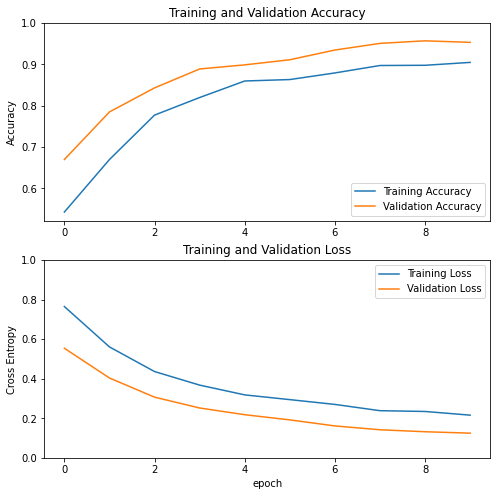

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Un-freeze the top layers of the model


In [ ]:
base_model.trainable = True

In [ ]:
#  layers  in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model



In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:


fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20


 1/63 [..............................] - ETA: 4:34 - loss: 0.2387 - accuracy: 0.9062

 3/63 [>.............................] - ETA: 2s - loss: 0.2282 - accuracy: 0.9375  

 5/63 [=>............................] - ETA: 2s - loss: 0.1860 - accuracy: 0.9375

 7/63 [==>...........................] - ETA: 2s - loss: 0.1670 - accuracy: 0.9420

 9/63 [===>..........................] - ETA: 2s - loss: 0.1691 - accuracy: 0.9340

11/63 [====>.........................] - ETA: 1s - loss: 0.1585 - accuracy: 0.9432

13/63 [=====>........................] - ETA: 1s - loss: 0.1515 - accuracy: 0.9423

15/63 [======>.......................] - ETA: 1s - loss: 0.1612 - accuracy: 0.9396

17/63 [=======>......................] - ETA: 1s - loss: 0.1543 - accuracy: 0.9412

19/63 [========>.....................] - ETA: 1s - loss: 0.1546 - accuracy: 0.9391

21/63 [=========>....................] - ETA: 1s - loss: 0.1669 - accuracy: 0.9315

23/63 [=========>....................] - ETA: 1s - loss: 0.1666 - accuracy: 0.9321

25/63 [==========>...................] - ETA: 1s - loss: 0.1620 - accuracy: 0.9350

27/63 [===========>..................] - ETA: 1s - loss: 0.1607 - accuracy: 0.9340

29/63 [============>.................] - ETA: 1s - loss: 0.1613 - accuracy: 0.9310

31/63 [=============>................] - ETA: 1s - loss: 0.1602 - accuracy: 0.9335

33/63 [==============>...............] - ETA: 1s - loss: 0.1631 - accuracy: 0.9318

35/63 [===============>..............] - ETA: 1s - loss: 0.1623 - accuracy: 0.9304

37/63 [================>.............] - ETA: 0s - loss: 0.1616 - accuracy: 0.9307

39/63 [=================>............] - ETA: 0s - loss: 0.1594 - accuracy: 0.9327

41/63 [==================>...........] - ETA: 0s - loss: 0.1595 - accuracy: 0.9306

43/63 [===================>..........] - ETA: 0s - loss: 0.1615 - accuracy: 0.9295

45/63 [====================>.........] - ETA: 0s - loss: 0.1593 - accuracy: 0.9312

47/63 [=====================>........] - ETA: 0s - loss: 0.1603 - accuracy: 0.9302

49/63 [======================>.......] - ETA: 0s - loss: 0.1599 - accuracy: 0.9292

51/63 [=======================>......] - ETA: 0s - loss: 0.1592 - accuracy: 0.9289

53/63 [========================>.....] - ETA: 0s - loss: 0.1575 - accuracy: 0.9292

55/63 [=========================>....] - ETA: 0s - loss: 0.1552 - accuracy: 0.9295

57/63 [==========================>...] - ETA: 0s - loss: 0.1536 - accuracy: 0.9309

59/63 [===========================>..] - ETA: 0s - loss: 0.1515 - accuracy: 0.9322

61/63 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9324

63/63 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.9320

63/63 [==============================] - 8s 56ms/step - loss: 0.1508 - accuracy: 0.9320 - val_loss: 0.0555 - val_accuracy: 0.9814


Epoch 11/20


 1/63 [..............................] - ETA: 4s - loss: 0.0182 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0413 - accuracy: 1.0000

 5/63 [=>............................] - ETA: 2s - loss: 0.0842 - accuracy: 0.9812

 7/63 [==>...........................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9821

 9/63 [===>..........................] - ETA: 1s - loss: 0.0877 - accuracy: 0.9792

11/63 [====>.........................] - ETA: 1s - loss: 0.1086 - accuracy: 0.9659

13/63 [=====>........................] - ETA: 1s - loss: 0.1049 - accuracy: 0.9663

15/63 [======>.......................] - ETA: 1s - loss: 0.1019 - accuracy: 0.9646

17/63 [=======>......................] - ETA: 1s - loss: 0.1055 - accuracy: 0.9632

19/63 [========>.....................] - ETA: 1s - loss: 0.1162 - accuracy: 0.9589

21/63 [=========>....................] - ETA: 1s - loss: 0.1176 - accuracy: 0.9568

23/63 [=========>....................] - ETA: 1s - loss: 0.1181 - accuracy: 0.9579

25/63 [==========>...................] - ETA: 1s - loss: 0.1210 - accuracy: 0.9563

27/63 [===========>..................] - ETA: 1s - loss: 0.1183 - accuracy: 0.9572

29/63 [============>.................] - ETA: 1s - loss: 0.1167 - accuracy: 0.9569

31/63 [=============>................] - ETA: 1s - loss: 0.1261 - accuracy: 0.9526

33/63 [==============>...............] - ETA: 1s - loss: 0.1248 - accuracy: 0.9527

35/63 [===============>..............] - ETA: 1s - loss: 0.1227 - accuracy: 0.9518

37/63 [================>.............] - ETA: 0s - loss: 0.1223 - accuracy: 0.9519

39/63 [=================>............] - ETA: 0s - loss: 0.1242 - accuracy: 0.9511

41/63 [==================>...........] - ETA: 0s - loss: 0.1231 - accuracy: 0.9520

43/63 [===================>..........] - ETA: 0s - loss: 0.1253 - accuracy: 0.9520

45/63 [====================>.........] - ETA: 0s - loss: 0.1231 - accuracy: 0.9528

47/63 [=====================>........] - ETA: 0s - loss: 0.1276 - accuracy: 0.9508

49/63 [======================>.......] - ETA: 0s - loss: 0.1294 - accuracy: 0.9496

51/63 [=======================>......] - ETA: 0s - loss: 0.1292 - accuracy: 0.9504

53/63 [========================>.....] - ETA: 0s - loss: 0.1279 - accuracy: 0.9505

55/63 [=========================>....] - ETA: 0s - loss: 0.1290 - accuracy: 0.9500

57/63 [==========================>...] - ETA: 0s - loss: 0.1269 - accuracy: 0.9507

59/63 [===========================>..] - ETA: 0s - loss: 0.1248 - accuracy: 0.9513

61/63 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9513

63/63 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9515

63/63 [==============================] - 3s 44ms/step - loss: 0.1231 - accuracy: 0.9515 - val_loss: 0.0437 - val_accuracy: 0.9827


Epoch 12/20


 1/63 [..............................] - ETA: 3s - loss: 0.0985 - accuracy: 0.9688

 3/63 [>.............................] - ETA: 2s - loss: 0.0786 - accuracy: 0.9688

 5/63 [=>............................] - ETA: 2s - loss: 0.0932 - accuracy: 0.9625

 7/63 [==>...........................] - ETA: 2s - loss: 0.0767 - accuracy: 0.9688

 9/63 [===>..........................] - ETA: 2s - loss: 0.0929 - accuracy: 0.9618

11/63 [====>.........................] - ETA: 1s - loss: 0.0957 - accuracy: 0.9602

13/63 [=====>........................] - ETA: 1s - loss: 0.0977 - accuracy: 0.9567

15/63 [======>.......................] - ETA: 1s - loss: 0.1036 - accuracy: 0.9521

17/63 [=======>......................] - ETA: 1s - loss: 0.1027 - accuracy: 0.9504

19/63 [========>.....................] - ETA: 1s - loss: 0.1005 - accuracy: 0.9523

21/63 [=========>....................] - ETA: 1s - loss: 0.1071 - accuracy: 0.9494

23/63 [=========>....................] - ETA: 1s - loss: 0.1074 - accuracy: 0.9511

25/63 [==========>...................] - ETA: 1s - loss: 0.1125 - accuracy: 0.9488

27/63 [===========>..................] - ETA: 1s - loss: 0.1088 - accuracy: 0.9502

29/63 [============>.................] - ETA: 1s - loss: 0.1036 - accuracy: 0.9526

31/63 [=============>................] - ETA: 1s - loss: 0.1028 - accuracy: 0.9526

33/63 [==============>...............] - ETA: 1s - loss: 0.1039 - accuracy: 0.9527

35/63 [===============>..............] - ETA: 1s - loss: 0.1039 - accuracy: 0.9527

37/63 [================>.............] - ETA: 0s - loss: 0.1055 - accuracy: 0.9527

39/63 [=================>............] - ETA: 0s - loss: 0.1084 - accuracy: 0.9519

41/63 [==================>...........] - ETA: 0s - loss: 0.1081 - accuracy: 0.9512

43/63 [===================>..........] - ETA: 0s - loss: 0.1074 - accuracy: 0.9513

45/63 [====================>.........] - ETA: 0s - loss: 0.1138 - accuracy: 0.9500

47/63 [=====================>........] - ETA: 0s - loss: 0.1132 - accuracy: 0.9508

49/63 [======================>.......] - ETA: 0s - loss: 0.1104 - accuracy: 0.9528

51/63 [=======================>......] - ETA: 0s - loss: 0.1104 - accuracy: 0.9528

53/63 [========================>.....] - ETA: 0s - loss: 0.1108 - accuracy: 0.9528

55/63 [=========================>....] - ETA: 0s - loss: 0.1097 - accuracy: 0.9528

57/63 [==========================>...] - ETA: 0s - loss: 0.1103 - accuracy: 0.9529

59/63 [===========================>..] - ETA: 0s - loss: 0.1074 - accuracy: 0.9544

61/63 [============================>.] - ETA: 0s - loss: 0.1064 - accuracy: 0.9549

63/63 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9550

63/63 [==============================] - 3s 44ms/step - loss: 0.1057 - accuracy: 0.9550 - val_loss: 0.0409 - val_accuracy: 0.9851


Epoch 13/20


 1/63 [..............................] - ETA: 3s - loss: 0.0211 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0759 - accuracy: 0.9896

 5/63 [=>............................] - ETA: 2s - loss: 0.0548 - accuracy: 0.9937

 7/63 [==>...........................] - ETA: 2s - loss: 0.0544 - accuracy: 0.9911

 9/63 [===>..........................] - ETA: 1s - loss: 0.0655 - accuracy: 0.9757

11/63 [====>.........................] - ETA: 1s - loss: 0.0766 - accuracy: 0.9688

13/63 [=====>........................] - ETA: 1s - loss: 0.0946 - accuracy: 0.9639

15/63 [======>.......................] - ETA: 1s - loss: 0.0983 - accuracy: 0.9604

17/63 [=======>......................] - ETA: 1s - loss: 0.0917 - accuracy: 0.9632

19/63 [========>.....................] - ETA: 1s - loss: 0.0874 - accuracy: 0.9671

21/63 [=========>....................] - ETA: 1s - loss: 0.0905 - accuracy: 0.9658

23/63 [=========>....................] - ETA: 1s - loss: 0.1025 - accuracy: 0.9633

25/63 [==========>...................] - ETA: 1s - loss: 0.1041 - accuracy: 0.9625

27/63 [===========>..................] - ETA: 1s - loss: 0.1005 - accuracy: 0.9618

29/63 [============>.................] - ETA: 1s - loss: 0.1018 - accuracy: 0.9612

31/63 [=============>................] - ETA: 1s - loss: 0.0983 - accuracy: 0.9617

33/63 [==============>...............] - ETA: 1s - loss: 0.0957 - accuracy: 0.9631

35/63 [===============>..............] - ETA: 1s - loss: 0.0961 - accuracy: 0.9625

37/63 [================>.............] - ETA: 0s - loss: 0.0959 - accuracy: 0.9620

39/63 [=================>............] - ETA: 0s - loss: 0.1005 - accuracy: 0.9607

41/63 [==================>...........] - ETA: 0s - loss: 0.0998 - accuracy: 0.9611

43/63 [===================>..........] - ETA: 0s - loss: 0.1003 - accuracy: 0.9608

45/63 [====================>.........] - ETA: 0s - loss: 0.0996 - accuracy: 0.9604

47/63 [=====================>........] - ETA: 0s - loss: 0.0972 - accuracy: 0.9614

49/63 [======================>.......] - ETA: 0s - loss: 0.0956 - accuracy: 0.9624

51/63 [=======================>......] - ETA: 0s - loss: 0.0962 - accuracy: 0.9620

53/63 [========================>.....] - ETA: 0s - loss: 0.0960 - accuracy: 0.9623

55/63 [=========================>....] - ETA: 0s - loss: 0.0967 - accuracy: 0.9608

57/63 [==========================>...] - ETA: 0s - loss: 0.0952 - accuracy: 0.9616

59/63 [===========================>..] - ETA: 0s - loss: 0.0938 - accuracy: 0.9624

61/63 [============================>.] - ETA: 0s - loss: 0.0925 - accuracy: 0.9631

63/63 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9620

63/63 [==============================] - 3s 44ms/step - loss: 0.0935 - accuracy: 0.9620 - val_loss: 0.0361 - val_accuracy: 0.9889


Epoch 14/20


 1/63 [..............................] - ETA: 3s - loss: 0.0125 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.1178 - accuracy: 0.9583

 5/63 [=>............................] - ETA: 2s - loss: 0.0967 - accuracy: 0.9625

 7/63 [==>...........................] - ETA: 2s - loss: 0.0823 - accuracy: 0.9688

 9/63 [===>..........................] - ETA: 1s - loss: 0.0713 - accuracy: 0.9757

11/63 [====>.........................] - ETA: 1s - loss: 0.0827 - accuracy: 0.9716

13/63 [=====>........................] - ETA: 1s - loss: 0.0840 - accuracy: 0.9688

15/63 [======>.......................] - ETA: 1s - loss: 0.0947 - accuracy: 0.9667

17/63 [=======>......................] - ETA: 1s - loss: 0.0987 - accuracy: 0.9669

19/63 [========>.....................] - ETA: 1s - loss: 0.1007 - accuracy: 0.9655

21/63 [=========>....................] - ETA: 1s - loss: 0.1050 - accuracy: 0.9628

23/63 [=========>....................] - ETA: 1s - loss: 0.0987 - accuracy: 0.9647

25/63 [==========>...................] - ETA: 1s - loss: 0.0999 - accuracy: 0.9638

27/63 [===========>..................] - ETA: 1s - loss: 0.0978 - accuracy: 0.9641

29/63 [============>.................] - ETA: 1s - loss: 0.0956 - accuracy: 0.9644

31/63 [=============>................] - ETA: 1s - loss: 0.0957 - accuracy: 0.9657

33/63 [==============>...............] - ETA: 1s - loss: 0.0928 - accuracy: 0.9669

35/63 [===============>..............] - ETA: 1s - loss: 0.0950 - accuracy: 0.9643

37/63 [================>.............] - ETA: 0s - loss: 0.0924 - accuracy: 0.9654

39/63 [=================>............] - ETA: 0s - loss: 0.0924 - accuracy: 0.9647

41/63 [==================>...........] - ETA: 0s - loss: 0.0931 - accuracy: 0.9649

43/63 [===================>..........] - ETA: 0s - loss: 0.0959 - accuracy: 0.9637

45/63 [====================>.........] - ETA: 0s - loss: 0.0963 - accuracy: 0.9632

47/63 [=====================>........] - ETA: 0s - loss: 0.0958 - accuracy: 0.9628

49/63 [======================>.......] - ETA: 0s - loss: 0.0958 - accuracy: 0.9630

51/63 [=======================>......] - ETA: 0s - loss: 0.0962 - accuracy: 0.9614

53/63 [========================>.....] - ETA: 0s - loss: 0.0960 - accuracy: 0.9617

55/63 [=========================>....] - ETA: 0s - loss: 0.0971 - accuracy: 0.9619

57/63 [==========================>...] - ETA: 0s - loss: 0.0945 - accuracy: 0.9633

59/63 [===========================>..] - ETA: 0s - loss: 0.0949 - accuracy: 0.9624

61/63 [============================>.] - ETA: 0s - loss: 0.0944 - accuracy: 0.9626

63/63 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9635

63/63 [==============================] - 3s 44ms/step - loss: 0.0929 - accuracy: 0.9635 - val_loss: 0.0304 - val_accuracy: 0.9901


Epoch 15/20


 1/63 [..............................] - ETA: 3s - loss: 0.0421 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0749 - accuracy: 0.9792

 5/63 [=>............................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9750

 7/63 [==>...........................] - ETA: 2s - loss: 0.0707 - accuracy: 0.9777

 9/63 [===>..........................] - ETA: 1s - loss: 0.0753 - accuracy: 0.9757

11/63 [====>.........................] - ETA: 1s - loss: 0.0703 - accuracy: 0.9773

13/63 [=====>........................] - ETA: 1s - loss: 0.0667 - accuracy: 0.9784

15/63 [======>.......................] - ETA: 1s - loss: 0.0632 - accuracy: 0.9792

17/63 [=======>......................] - ETA: 1s - loss: 0.0603 - accuracy: 0.9816

19/63 [========>.....................] - ETA: 1s - loss: 0.0687 - accuracy: 0.9786

21/63 [=========>....................] - ETA: 1s - loss: 0.0715 - accuracy: 0.9747

23/63 [=========>....................] - ETA: 1s - loss: 0.0746 - accuracy: 0.9728

25/63 [==========>...................] - ETA: 1s - loss: 0.0730 - accuracy: 0.9725

27/63 [===========>..................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9722

29/63 [============>.................] - ETA: 1s - loss: 0.0878 - accuracy: 0.9677

31/63 [=============>................] - ETA: 1s - loss: 0.0850 - accuracy: 0.9688

33/63 [==============>...............] - ETA: 1s - loss: 0.0860 - accuracy: 0.9669

35/63 [===============>..............] - ETA: 1s - loss: 0.0820 - accuracy: 0.9688

37/63 [================>.............] - ETA: 0s - loss: 0.0808 - accuracy: 0.9688

39/63 [=================>............] - ETA: 0s - loss: 0.0795 - accuracy: 0.9688

41/63 [==================>...........] - ETA: 0s - loss: 0.0787 - accuracy: 0.9688

43/63 [===================>..........] - ETA: 0s - loss: 0.0788 - accuracy: 0.9680

45/63 [====================>.........] - ETA: 0s - loss: 0.0813 - accuracy: 0.9660

47/63 [=====================>........] - ETA: 0s - loss: 0.0799 - accuracy: 0.9668

49/63 [======================>.......] - ETA: 0s - loss: 0.0786 - accuracy: 0.9668

51/63 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9669

53/63 [========================>.....] - ETA: 0s - loss: 0.0784 - accuracy: 0.9676

55/63 [=========================>....] - ETA: 0s - loss: 0.0788 - accuracy: 0.9676

57/63 [==========================>...] - ETA: 0s - loss: 0.0789 - accuracy: 0.9677

59/63 [===========================>..] - ETA: 0s - loss: 0.0795 - accuracy: 0.9677

61/63 [============================>.] - ETA: 0s - loss: 0.0802 - accuracy: 0.9672

63/63 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9675

63/63 [==============================] - 3s 44ms/step - loss: 0.0797 - accuracy: 0.9675 - val_loss: 0.0309 - val_accuracy: 0.9876


Epoch 16/20


 1/63 [..............................] - ETA: 3s - loss: 0.0161 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0690 - accuracy: 0.9792

 5/63 [=>............................] - ETA: 2s - loss: 0.0708 - accuracy: 0.9812

 7/63 [==>...........................] - ETA: 2s - loss: 0.0611 - accuracy: 0.9866

 9/63 [===>..........................] - ETA: 1s - loss: 0.0728 - accuracy: 0.9757

11/63 [====>.........................] - ETA: 1s - loss: 0.0925 - accuracy: 0.9659

13/63 [=====>........................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9712

15/63 [======>.......................] - ETA: 1s - loss: 0.0784 - accuracy: 0.9729

17/63 [=======>......................] - ETA: 1s - loss: 0.0818 - accuracy: 0.9724

19/63 [========>.....................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9720

21/63 [=========>....................] - ETA: 1s - loss: 0.0752 - accuracy: 0.9717

23/63 [=========>....................] - ETA: 1s - loss: 0.0823 - accuracy: 0.9701

25/63 [==========>...................] - ETA: 1s - loss: 0.0777 - accuracy: 0.9712

27/63 [===========>..................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9711

29/63 [============>.................] - ETA: 1s - loss: 0.0781 - accuracy: 0.9709

31/63 [=============>................] - ETA: 1s - loss: 0.0836 - accuracy: 0.9677

33/63 [==============>...............] - ETA: 1s - loss: 0.0836 - accuracy: 0.9688

35/63 [===============>..............] - ETA: 1s - loss: 0.0830 - accuracy: 0.9688

37/63 [================>.............] - ETA: 0s - loss: 0.0817 - accuracy: 0.9688

39/63 [=================>............] - ETA: 0s - loss: 0.0824 - accuracy: 0.9679

41/63 [==================>...........] - ETA: 0s - loss: 0.0806 - accuracy: 0.9680

43/63 [===================>..........] - ETA: 0s - loss: 0.0805 - accuracy: 0.9680

45/63 [====================>.........] - ETA: 0s - loss: 0.0806 - accuracy: 0.9674

47/63 [=====================>........] - ETA: 0s - loss: 0.0792 - accuracy: 0.9674

49/63 [======================>.......] - ETA: 0s - loss: 0.0770 - accuracy: 0.9688

51/63 [=======================>......] - ETA: 0s - loss: 0.0802 - accuracy: 0.9675

53/63 [========================>.....] - ETA: 0s - loss: 0.0850 - accuracy: 0.9652

55/63 [=========================>....] - ETA: 0s - loss: 0.0830 - accuracy: 0.9659

57/63 [==========================>...] - ETA: 0s - loss: 0.0843 - accuracy: 0.9649

59/63 [===========================>..] - ETA: 0s - loss: 0.0829 - accuracy: 0.9656

61/63 [============================>.] - ETA: 0s - loss: 0.0821 - accuracy: 0.9662

63/63 [==============================] - ETA: 0s - loss: 0.0809 - accuracy: 0.9670

63/63 [==============================] - 3s 44ms/step - loss: 0.0809 - accuracy: 0.9670 - val_loss: 0.0270 - val_accuracy: 0.9876


Epoch 17/20


 1/63 [..............................] - ETA: 3s - loss: 0.0413 - accuracy: 0.9688

 3/63 [>.............................] - ETA: 2s - loss: 0.0845 - accuracy: 0.9479

 5/63 [=>............................] - ETA: 2s - loss: 0.0694 - accuracy: 0.9625

 7/63 [==>...........................] - ETA: 2s - loss: 0.0872 - accuracy: 0.9554

 9/63 [===>..........................] - ETA: 2s - loss: 0.0724 - accuracy: 0.9653

11/63 [====>.........................] - ETA: 1s - loss: 0.0694 - accuracy: 0.9659

13/63 [=====>........................] - ETA: 1s - loss: 0.0779 - accuracy: 0.9615

15/63 [======>.......................] - ETA: 1s - loss: 0.0825 - accuracy: 0.9625

17/63 [=======>......................] - ETA: 1s - loss: 0.0909 - accuracy: 0.9614

19/63 [========>.....................] - ETA: 1s - loss: 0.0885 - accuracy: 0.9638

21/63 [=========>....................] - ETA: 1s - loss: 0.0870 - accuracy: 0.9658

23/63 [=========>....................] - ETA: 1s - loss: 0.0808 - accuracy: 0.9688

25/63 [==========>...................] - ETA: 1s - loss: 0.0806 - accuracy: 0.9688

27/63 [===========>..................] - ETA: 1s - loss: 0.0758 - accuracy: 0.9711

29/63 [============>.................] - ETA: 1s - loss: 0.0872 - accuracy: 0.9634

31/63 [=============>................] - ETA: 1s - loss: 0.0865 - accuracy: 0.9637

33/63 [==============>...............] - ETA: 1s - loss: 0.0838 - accuracy: 0.9650

35/63 [===============>..............] - ETA: 1s - loss: 0.0840 - accuracy: 0.9643

37/63 [================>.............] - ETA: 0s - loss: 0.0832 - accuracy: 0.9645

39/63 [=================>............] - ETA: 0s - loss: 0.0855 - accuracy: 0.9639

41/63 [==================>...........] - ETA: 0s - loss: 0.0824 - accuracy: 0.9657

43/63 [===================>..........] - ETA: 0s - loss: 0.0824 - accuracy: 0.9658

45/63 [====================>.........] - ETA: 0s - loss: 0.0797 - accuracy: 0.9674

47/63 [=====================>........] - ETA: 0s - loss: 0.0808 - accuracy: 0.9674

49/63 [======================>.......] - ETA: 0s - loss: 0.0783 - accuracy: 0.9688

51/63 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9688

53/63 [========================>.....] - ETA: 0s - loss: 0.0786 - accuracy: 0.9676

55/63 [=========================>....] - ETA: 0s - loss: 0.0804 - accuracy: 0.9665

57/63 [==========================>...] - ETA: 0s - loss: 0.0788 - accuracy: 0.9671

59/63 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.9672

61/63 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9677

63/63 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9680

63/63 [==============================] - 3s 44ms/step - loss: 0.0776 - accuracy: 0.9680 - val_loss: 0.0279 - val_accuracy: 0.9864


Epoch 18/20


 1/63 [..............................] - ETA: 3s - loss: 0.0141 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9792

 5/63 [=>............................] - ETA: 2s - loss: 0.0698 - accuracy: 0.9812

 7/63 [==>...........................] - ETA: 2s - loss: 0.0621 - accuracy: 0.9821

 9/63 [===>..........................] - ETA: 2s - loss: 0.0577 - accuracy: 0.9792

11/63 [====>.........................] - ETA: 1s - loss: 0.0533 - accuracy: 0.9801

13/63 [=====>........................] - ETA: 1s - loss: 0.0530 - accuracy: 0.9808

15/63 [======>.......................] - ETA: 1s - loss: 0.0478 - accuracy: 0.9833

17/63 [=======>......................] - ETA: 1s - loss: 0.0493 - accuracy: 0.9798

19/63 [========>.....................] - ETA: 1s - loss: 0.0512 - accuracy: 0.9786

21/63 [=========>....................] - ETA: 1s - loss: 0.0475 - accuracy: 0.9807

23/63 [=========>....................] - ETA: 1s - loss: 0.0455 - accuracy: 0.9810

25/63 [==========>...................] - ETA: 1s - loss: 0.0434 - accuracy: 0.9825

27/63 [===========>..................] - ETA: 1s - loss: 0.0526 - accuracy: 0.9780

29/63 [============>.................] - ETA: 1s - loss: 0.0608 - accuracy: 0.9741

31/63 [=============>................] - ETA: 1s - loss: 0.0623 - accuracy: 0.9728

33/63 [==============>...............] - ETA: 1s - loss: 0.0613 - accuracy: 0.9735

35/63 [===============>..............] - ETA: 1s - loss: 0.0651 - accuracy: 0.9723

37/63 [================>.............] - ETA: 0s - loss: 0.0661 - accuracy: 0.9721

39/63 [=================>............] - ETA: 0s - loss: 0.0668 - accuracy: 0.9720

41/63 [==================>...........] - ETA: 0s - loss: 0.0658 - accuracy: 0.9726

43/63 [===================>..........] - ETA: 0s - loss: 0.0648 - accuracy: 0.9731

45/63 [====================>.........] - ETA: 0s - loss: 0.0658 - accuracy: 0.9715

47/63 [=====================>........] - ETA: 0s - loss: 0.0639 - accuracy: 0.9727

49/63 [======================>.......] - ETA: 0s - loss: 0.0636 - accuracy: 0.9726

51/63 [=======================>......] - ETA: 0s - loss: 0.0625 - accuracy: 0.9730

53/63 [========================>.....] - ETA: 0s - loss: 0.0627 - accuracy: 0.9735

55/63 [=========================>....] - ETA: 0s - loss: 0.0646 - accuracy: 0.9733

57/63 [==========================>...] - ETA: 0s - loss: 0.0640 - accuracy: 0.9731

59/63 [===========================>..] - ETA: 0s - loss: 0.0636 - accuracy: 0.9735

61/63 [============================>.] - ETA: 0s - loss: 0.0656 - accuracy: 0.9723

63/63 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9730

63/63 [==============================] - 3s 44ms/step - loss: 0.0646 - accuracy: 0.9730 - val_loss: 0.0244 - val_accuracy: 0.9913


Epoch 19/20


 1/63 [..............................] - ETA: 3s - loss: 0.0136 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0261 - accuracy: 0.9896

 5/63 [=>............................] - ETA: 2s - loss: 0.0375 - accuracy: 0.9750

 7/63 [==>...........................] - ETA: 2s - loss: 0.0393 - accuracy: 0.9777

 9/63 [===>..........................] - ETA: 2s - loss: 0.0380 - accuracy: 0.9792

11/63 [====>.........................] - ETA: 1s - loss: 0.0402 - accuracy: 0.9801

13/63 [=====>........................] - ETA: 1s - loss: 0.0367 - accuracy: 0.9808

15/63 [======>.......................] - ETA: 1s - loss: 0.0356 - accuracy: 0.9792

17/63 [=======>......................] - ETA: 1s - loss: 0.0350 - accuracy: 0.9816

19/63 [========>.....................] - ETA: 1s - loss: 0.0373 - accuracy: 0.9803

21/63 [=========>....................] - ETA: 1s - loss: 0.0427 - accuracy: 0.9777

23/63 [=========>....................] - ETA: 1s - loss: 0.0504 - accuracy: 0.9755

25/63 [==========>...................] - ETA: 1s - loss: 0.0487 - accuracy: 0.9775

27/63 [===========>..................] - ETA: 1s - loss: 0.0515 - accuracy: 0.9769

29/63 [============>.................] - ETA: 1s - loss: 0.0500 - accuracy: 0.9774

31/63 [=============>................] - ETA: 1s - loss: 0.0508 - accuracy: 0.9768

33/63 [==============>...............] - ETA: 1s - loss: 0.0508 - accuracy: 0.9773

35/63 [===============>..............] - ETA: 1s - loss: 0.0514 - accuracy: 0.9777

37/63 [================>.............] - ETA: 0s - loss: 0.0528 - accuracy: 0.9772

39/63 [=================>............] - ETA: 0s - loss: 0.0519 - accuracy: 0.9784

41/63 [==================>...........] - ETA: 0s - loss: 0.0513 - accuracy: 0.9779

43/63 [===================>..........] - ETA: 0s - loss: 0.0537 - accuracy: 0.9767

45/63 [====================>.........] - ETA: 0s - loss: 0.0562 - accuracy: 0.9757

47/63 [=====================>........] - ETA: 0s - loss: 0.0547 - accuracy: 0.9767

49/63 [======================>.......] - ETA: 0s - loss: 0.0559 - accuracy: 0.9764

51/63 [=======================>......] - ETA: 0s - loss: 0.0553 - accuracy: 0.9767

53/63 [========================>.....] - ETA: 0s - loss: 0.0539 - accuracy: 0.9776

55/63 [=========================>....] - ETA: 0s - loss: 0.0535 - accuracy: 0.9784

57/63 [==========================>...] - ETA: 0s - loss: 0.0553 - accuracy: 0.9770

59/63 [===========================>..] - ETA: 0s - loss: 0.0574 - accuracy: 0.9762

61/63 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9754

63/63 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9755

63/63 [==============================] - 3s 44ms/step - loss: 0.0580 - accuracy: 0.9755 - val_loss: 0.0326 - val_accuracy: 0.9901


Epoch 20/20


 1/63 [..............................] - ETA: 3s - loss: 0.0135 - accuracy: 1.0000

 3/63 [>.............................] - ETA: 2s - loss: 0.0314 - accuracy: 0.9792

 5/63 [=>............................] - ETA: 2s - loss: 0.0303 - accuracy: 0.9875

 7/63 [==>...........................] - ETA: 2s - loss: 0.0339 - accuracy: 0.9866

 9/63 [===>..........................] - ETA: 2s - loss: 0.0410 - accuracy: 0.9861

11/63 [====>.........................] - ETA: 1s - loss: 0.0473 - accuracy: 0.9858

13/63 [=====>........................] - ETA: 1s - loss: 0.0415 - accuracy: 0.9880

15/63 [======>.......................] - ETA: 1s - loss: 0.0397 - accuracy: 0.9896

17/63 [=======>......................] - ETA: 1s - loss: 0.0454 - accuracy: 0.9871

19/63 [========>.....................] - ETA: 1s - loss: 0.0479 - accuracy: 0.9852

21/63 [=========>....................] - ETA: 1s - loss: 0.0508 - accuracy: 0.9851

23/63 [=========>....................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9823

25/63 [==========>...................] - ETA: 1s - loss: 0.0531 - accuracy: 0.9825

27/63 [===========>..................] - ETA: 1s - loss: 0.0530 - accuracy: 0.9826

29/63 [============>.................] - ETA: 1s - loss: 0.0522 - accuracy: 0.9838

31/63 [=============>................] - ETA: 1s - loss: 0.0538 - accuracy: 0.9829

33/63 [==============>...............] - ETA: 1s - loss: 0.0521 - accuracy: 0.9830

35/63 [===============>..............] - ETA: 1s - loss: 0.0515 - accuracy: 0.9839

37/63 [================>.............] - ETA: 0s - loss: 0.0526 - accuracy: 0.9831

39/63 [=================>............] - ETA: 0s - loss: 0.0520 - accuracy: 0.9840

41/63 [==================>...........] - ETA: 0s - loss: 0.0502 - accuracy: 0.9848

43/63 [===================>..........] - ETA: 0s - loss: 0.0495 - accuracy: 0.9847

45/63 [====================>.........] - ETA: 0s - loss: 0.0501 - accuracy: 0.9847

47/63 [=====================>........] - ETA: 0s - loss: 0.0505 - accuracy: 0.9840

49/63 [======================>.......] - ETA: 0s - loss: 0.0514 - accuracy: 0.9841

51/63 [=======================>......] - ETA: 0s - loss: 0.0516 - accuracy: 0.9841

53/63 [========================>.....] - ETA: 0s - loss: 0.0503 - accuracy: 0.9841

55/63 [=========================>....] - ETA: 0s - loss: 0.0497 - accuracy: 0.9835

57/63 [==========================>...] - ETA: 0s - loss: 0.0512 - accuracy: 0.9830

59/63 [===========================>..] - ETA: 0s - loss: 0.0522 - accuracy: 0.9825

61/63 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9821

63/63 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9815

63/63 [==============================] - 3s 44ms/step - loss: 0.0522 - accuracy: 0.9815 - val_loss: 0.0248 - val_accuracy: 0.9901


After fine tuning the model nearly reaches 98% accuracy on the validation set.

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

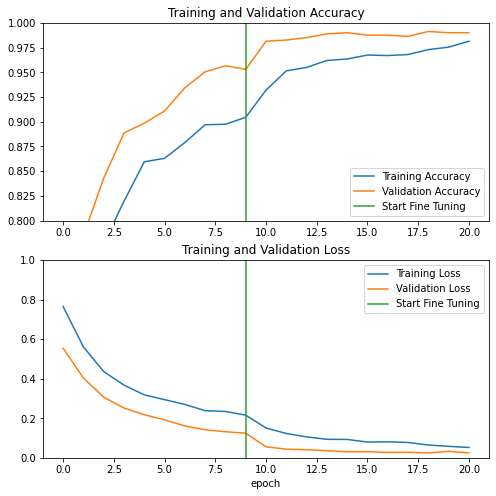

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation and prediction

verify the performance of the model on test set.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/6 [====>.........................] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000

4/6 [===================>..........] - ETA: 0s - loss: 0.0499 - accuracy: 0.9766

6/6 [==============================] - 0s 18ms/step - loss: 0.0383 - accuracy: 0.9844


Test accuracy : 0.984375


In [ ]:
#wrong predictions
import sklearn
result, model_outputs, wrong_predictions = model.eval_model(test_dataset)
print(result)
print(model_outputs)

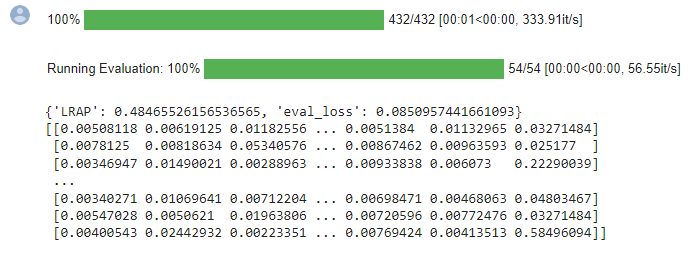

In [ ]:
final = pd.DataFrame({"SMILES":test_df.SMILES.tolist(),"PREDICTIONS":final_preds})
final.head()

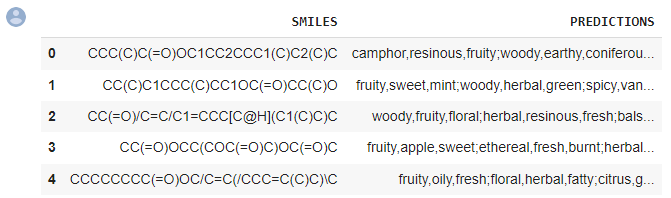

#Predictions from test dataset

In [ ]:
np.random.seed(42) # set random seed so we always get the same validation set
src =  (ImageList.from_df(path="/content/molecule_data/train", df=new_data, cols=["FILENAME"]).split_by_rand_pct(0.2).label_from_df(label_delim=',').databunch(num_workers=0,bs=64)).normalize(imagenet_stats)    

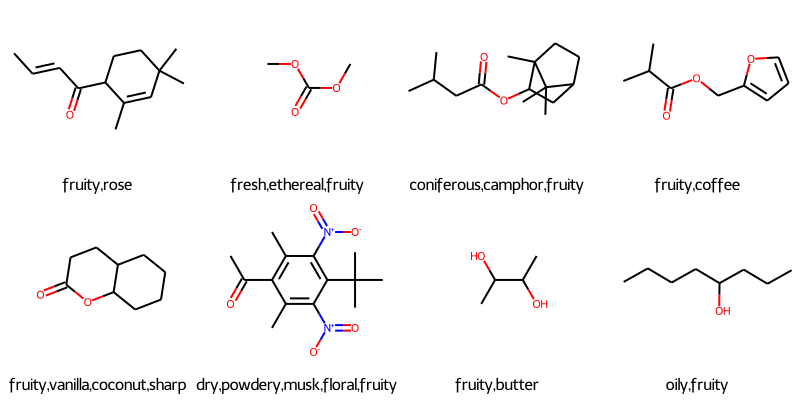

Plot 

In [ ]:
# create metrics
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = dnn_learner(src, models.ann, metrics=[acc_02, f_score])
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate

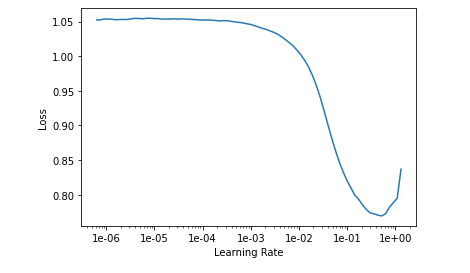

In [ ]:
val_fns = [str(x) for x in learn.data.valid_ds.items]
val_fns_y=[str(x) for x in learn.data.valid_ds.y]
for img,gt in zip(val_fns,val_fns_y):
  pred_class, pred_idx, preds=learn.predict(open_image(img))
  print("----------------------------------------------------------")
  thresh = 0.1
  labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(preds) if p > thresh])]
  print("GT:",gt)
  print("PREDS:",labelled_preds)
  print("----------------------------------------------------------")


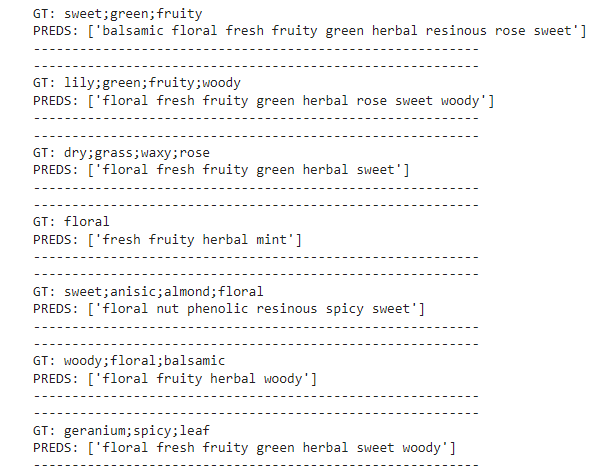

In [ ]:
np.random.seed(42) # set random seed so we always get the same validation set
src =  (ImageList.from_df(path="/content/molecule_data/train", df=new_data, cols=["FILENAME"]).split_by_rand_pct(0.2).label_from_df(label_delim=',').databunch(num_workers=0,bs=64)).normalize(imagenet_stats)    

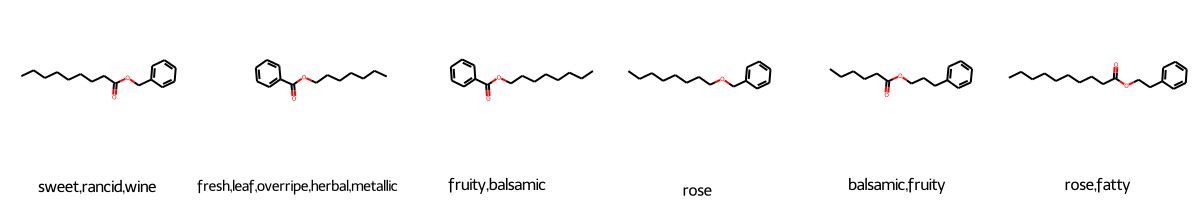